# **Credit Card Customers Churn Prediction💡**

# **Introduction 💰 -**

*   The bank's manager is concerned about customers leaving their credit card
services. The goal of this analysis is to create a model that predicts whether a customer is likely to leave or not. This prediction will help the bank proactively engage with at-risk customers, provide better services, and ultimately reduce customer churn.

Kaggle Dataset Link - https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

# **Insights into the data -**


*   The dataset contains information on 10,127 bank customers.
*  Categorical features include customer attrition status, gender, education level, marital status, income category, and card category.
* Numerical features include customer age, number of dependents, months as a customer, total product count, months of inactivity, contact count, credit limit, revolving balance, average open-to-buy credit, transaction amount changes, total transaction amount, total transaction count, transaction count changes, and average credit card utilization ratio.
* Attrition_Flag indicates customer churn status, where "Attrited Customer" represents churned customers, and "Existing Customer" represents those who haven't churned.
* The dataset is suitable for analyzing customer behavior and predicting churn.




SHAP Analysis -
SHAP (SHapley Additive exPlanations) analysis is a method used in machine learning for understanding and interpreting the predictions made by a model. It provides insights into how each feature contributes to the model's output for individual predictions.

## Installing Libraries

In [198]:
#Installing Dependencies
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install shap

## Importing Necessary Libraries

In [ ]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import logging
import csv
import time
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import shap
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Reading the data

In [ ]:
# Reading CSV file into Pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/ckulkarni13/Data_Science_Methods_Tools/main/BankChurners.csv")

In [ ]:
# Getting a glimpse into the dataset
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [ ]:
# Checking number of rows and columns of data
df.shape

(10127, 23)

In [ ]:
data_types = df.dtypes
categorical_columns = data_types[data_types == 'object'].index
numerical_columns = data_types[data_types != 'object'].index

# Count the number of categorical and numerical columns
num_categorical_columns = len(categorical_columns)
num_numerical_columns = len(numerical_columns)

print(f'Number of Categorical Columns: {num_categorical_columns}')
print(f'Number of Numerical Columns: {num_numerical_columns}')

Number of Categorical Columns: 6
Number of Numerical Columns: 17


In [ ]:
# Descriptive analysis for categorical data
df.describe(include='O')

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [ ]:
# Descriptive analysis for numerical data
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

In [ ]:
# Further insights into the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
#Checking if their are any missing values
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

## Preprocessing Data (Dropping unnecessary columns)

In [ ]:
# Dropping columns with unusual names
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

#Dropping CLIENTNUM column as it's a unique identifier and not useful for predictions.
df = df.drop( 'CLIENTNUM', axis=1)

In [ ]:
#Shape of data after non-useful columns dropped for the dataset
df.shape

(10127, 20)

### Histograms

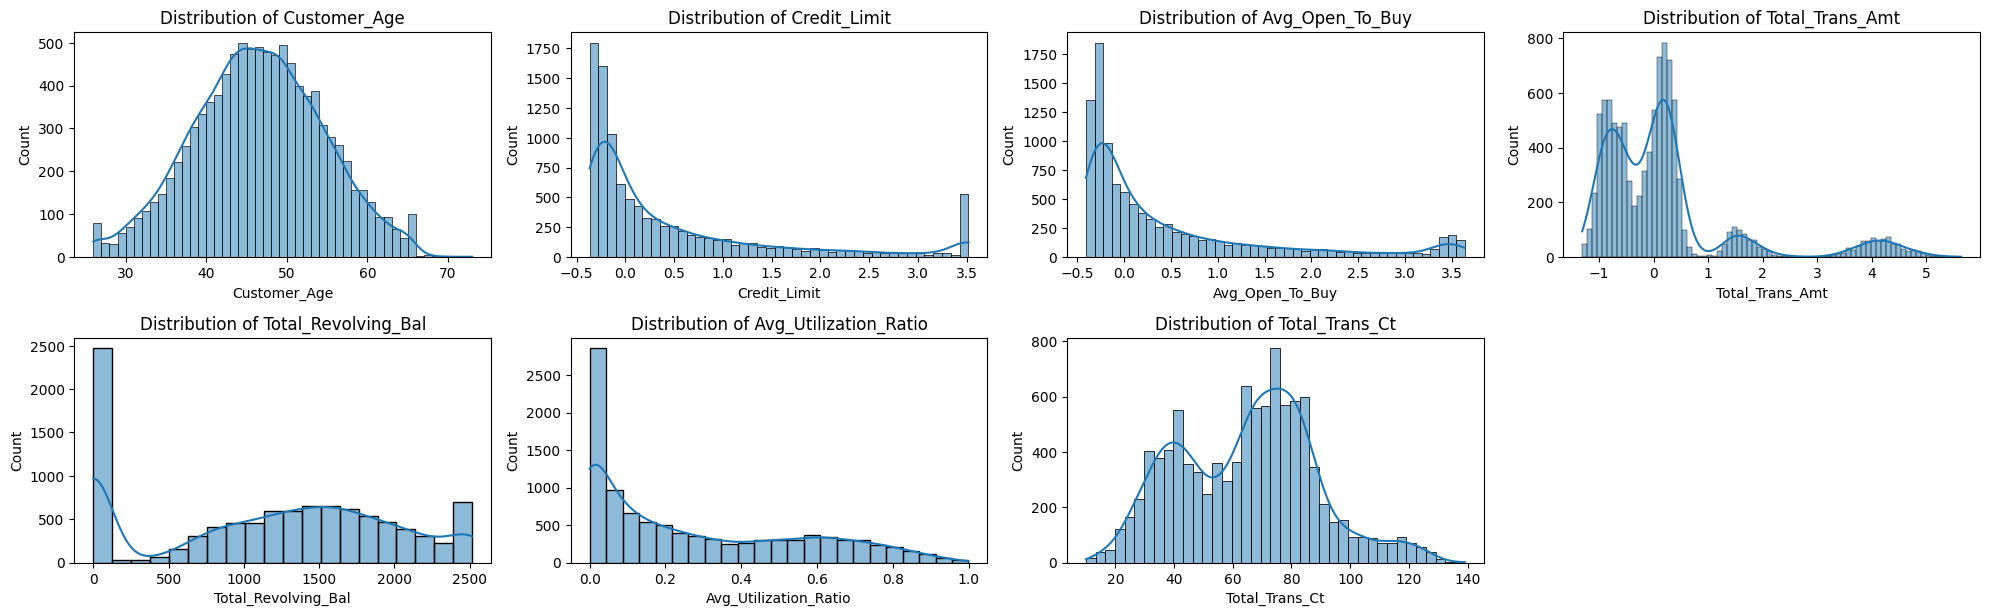

In [199]:
numeric_columns = ['Customer_Age', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Revolving_Bal','Avg_Utilization_Ratio',  'Total_Trans_Ct']
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

- Customer Age:
The distribution is roughly bell-shaped, indicating that the ages are normally distributed.
There are very few customers below 30 and above 70 years old.

- Avg_Open_To_Buy (The difference between the credit limit assigned to a customer and the current balance):
The distribution is right-skewed, meaning there are a lot of customers with a low open-to-buy value and fewer customers as the value increases.
There's a large peak at the lower end of the scale, suggesting many customers have a small amount of unused credit.

- Credit Limit:
Similar to Avg_Open_To_Buy, the distribution is right-skewed.
There's a significant number of customers with lower credit limits.
There are peaks at both ends of the distribution, indicating a group of customers with very high credit limits, which could be a separate customer segment such as premium or high-net-worth individuals.

- Total_Trans_Ct (Total transaction count):
The distribution is bimodal, with two peaks that suggest there are two distinct groups of customers based on transaction behavior.
Understanding why there are two modes might be critical to predict churn – it could be related to different types of customers, various products, or services they are using.

- Total_Trans_Amt (Total transaction amount):
The distribution is multimodal with several peaks, indicating multiple typical transaction amounts or groupings of transaction behaviors.
Like with Total_Trans_Ct, the reasons behind the various peaks may be essential for understanding customer behavior and, subsequently, for predicting churn

### Probability Plots

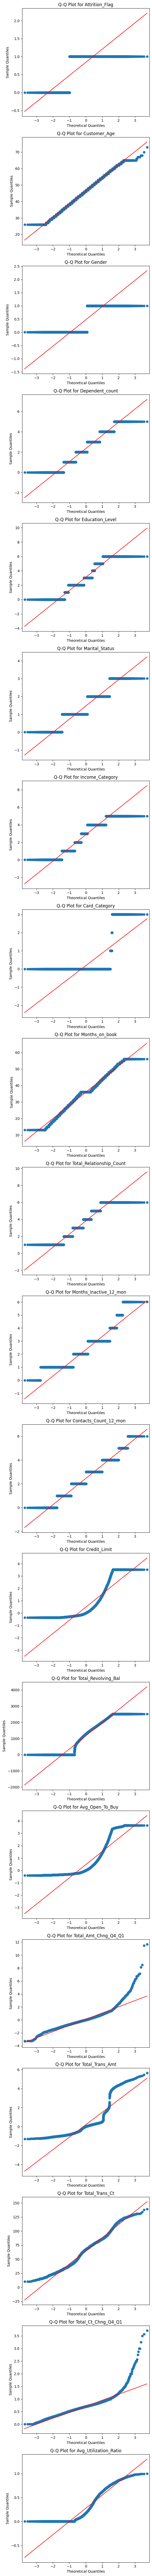

In [221]:
# Set up the figure and axes
numeric_columns_list = df.select_dtypes(include=['int', 'float']).columns.tolist()
fig, axes = plt.subplots(nrows=len(numeric_columns_list), figsize=(6, 5 * len(numeric_columns_list)))

# Plot Q-Q plots for each numeric variable
for i, variable in enumerate(numeric_columns_list):
    # Generate Q-Q plot using statsmodels
    sm.qqplot(df[variable], line='s', ax=axes[i])
    axes[i].set_title(f'Q-Q Plot for {variable}')  # Set plot title

# Adjust layout
plt.tight_layout()
plt.show()

QQ-plot is drawn for all the numeric columns:
- Q-Q plots are effective for assessing continuous variables like age and month on books, indicating their similarity to theoretical distributions.
- Alignment of data points in Q-Q plots suggests a close match between the dataset and expected distributions.
- For age and month on books columns, some of the data points align with the theoretical values. All the values in age are continuous in nature
- For gender, card category, and attrition flag, values are binomial. It is either yes/no or 1/0. - repsharse

#Label Encoding

In [ ]:
# Encoding categorical data to numerical value.

categorical_features = [
    'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
    'Income_Category', 'Card_Category'
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

#OLS Regression

In [223]:
#OLS Regression method.
var = sm.OLS(df['Attrition_Flag'], df[['Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]).fit()

var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Attrition_Flag   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     445.2
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:03:14   Log-Likelihood:                -1933.1
No. Observations:               10127   AIC:                             3894.
Df Residuals:                   10113   BIC:                             3995.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Customer_Age                 0.0002      0.001      0.273      0.785      -0.001       0.001
Dependent_count             -0.0120      0.002     -5.284      0.000      -0.016      -0.008
Months_on_book               0.0004      0.001      0.679      0.497      -0.001       0.002
Total_Relationship_Count     0.0432      0.002     21.454      0.000       0.039       0.047
Months_Inactive_12_mon      -0.0423      0.003    -14.587      0.000      -0.048      -0.037
Contacts_Count_12_mon       -0.0416      0.003    -15.507      0.000      -0.047      -0.036
Credit_Limit                 0.4637      0.222      2.088      0.037       0.028       0.899
Total_Revolving_Bal       4.472e-05   2.62e-05      1.710      0.087   -6.55e-06     9.6e-05
Avg_Open_To_Buy             -0.4523      0.222     -2.033      0.042      -0.888      -0.016
Total_Amt_Chng_Q4_Q1         0.0142      0.003      4.279      0.000       0.008       0.021
Total_Trans_Amt             -0.0899      0.004    -22.447      0.000      -0.098      -0.082
Total_Trans_Ct               0.0097      0.000     44.759      0.000       0.009       0.010
Total_Ct_Chng_Q4_Q1          0.2957      0.013     21.989      0.000       0.269       0.322
Avg_Utilization_Ratio       -0.0065      0.018     -0.364      0.716      -0.042       0.029
==============================================================================
Omnibus:                     1245.124   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1780.755
Skew:                          -0.943   Prob(JB):                         0.00
Kurtosis:                       3.814   Cond. No.                     1.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Random Forest Classifier

Index(['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Total_Revolving_Bal', 'Total_Relationship_Count'],
      dtype='object')


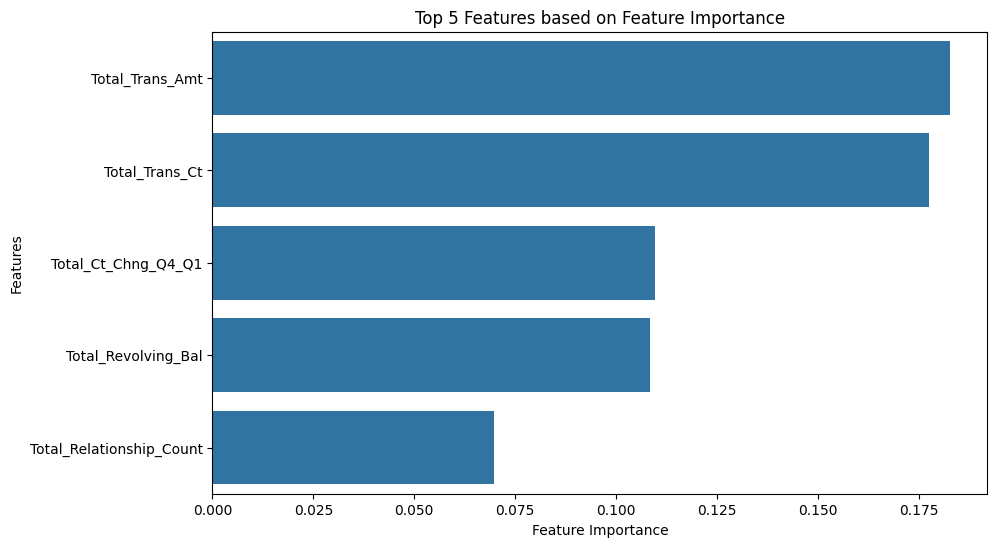

In [224]:
# Separate features
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Select the top N important features
n_selected_features = 5  # You can adjust this value
selected_features_indices = feature_importances.argsort()[-n_selected_features:][::-1]
selected_features = X.columns[selected_features_indices]

# Print selected features
print(selected_features)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[selected_features_indices], y=selected_features, orient="h")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title(f"Top {n_selected_features} Features based on Feature Importance")
plt.show()


# Heatmap

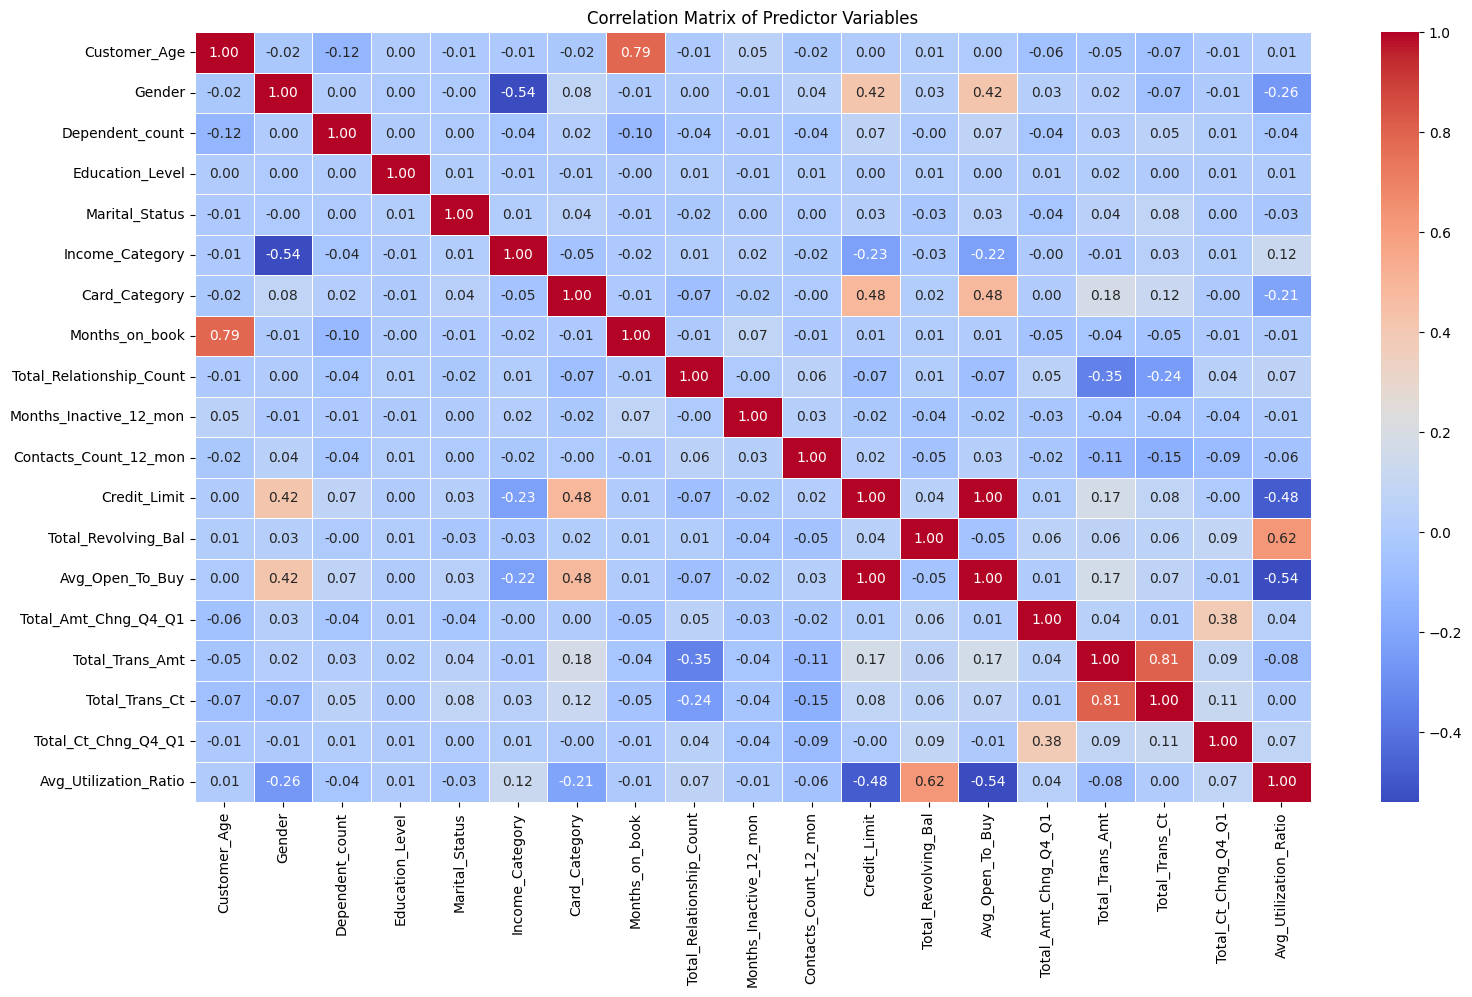

In [ ]:
# 1. Calculate correlations between numeric variables and the target variable
predictor_variables = df.drop(columns=['Attrition_Flag'])  # Exclude the target variable

# Calculate the correlation matrix
correlation_matrix = predictor_variables.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Predictor Variables')
plt.show()

- "Months_on_book" and "Customer_Age" have a high positive correlation of 0.79, suggesting a strong relationship between these two variables. This means they are not independent.
- "Credit_Limit" and "Avg_Open_To_Buy" also show a very high positive correlation of 0.99, which implies almost perfect positive linear relationship, and thus, they are not independent.
- "Total_Trans_Amt" and "Total_Trans_Ct" have a high positive correlation of 0.81, indicating a significant relationship and dependence between these two variables.

##Robut Scaler -Normalizing the data.

In [ ]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler = RobustScaler()

# Fit the scaler to the two columns with outliers and transform them
normalized_columns = scaler.fit_transform(df[['Credit_Limit',  'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']])

# Update the original DataFrame with the normalized values
df[['Credit_Limit',  'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']] = normalized_columns

In [ ]:
df[['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']].describe()

Credit_Limit  Avg_Open_To_Buy  Total_Trans_Amt  Total_Amt_Chng_Q4_Q1
count  10127.000000     10127.000000     10127.000000          10127.000000
mean       0.479642         0.468116         0.195353              0.105003
std        1.067698         1.065169         1.313916              0.961433
min       -0.365427        -0.406702        -1.310772             -3.228070
25%       -0.234244        -0.251860        -0.674338             -0.460526
50%        0.000000         0.000000         0.000000              0.000000
75%        0.765756         0.748140         0.325662              0.539474
max        3.520352         3.637237         5.641075             11.671053

#Handling Outliers

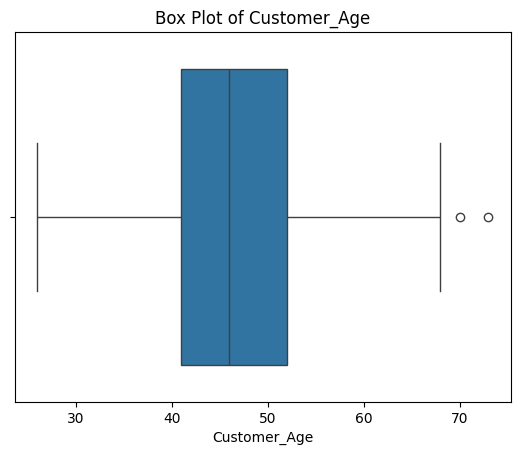

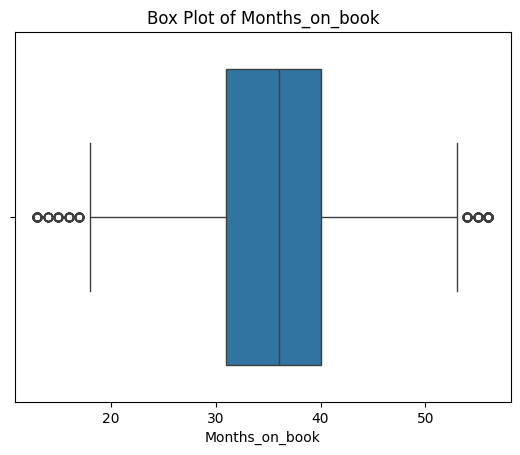

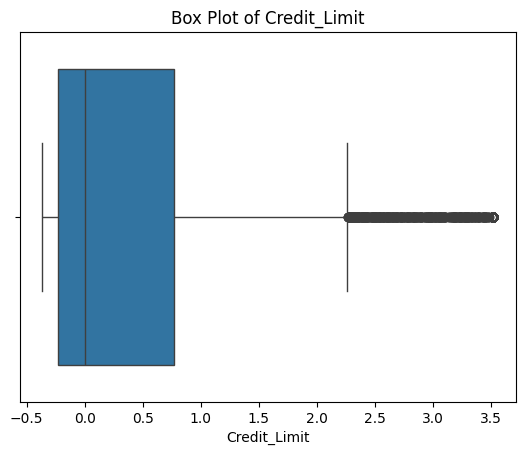

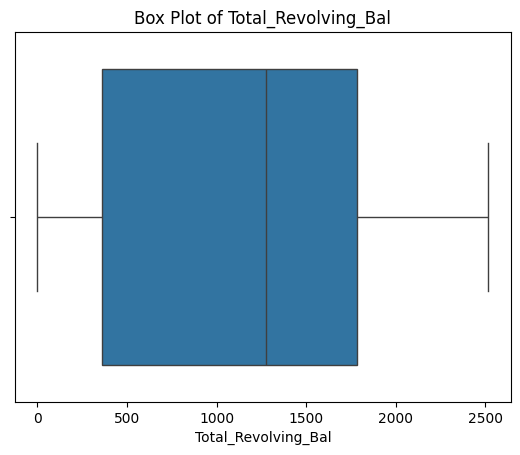

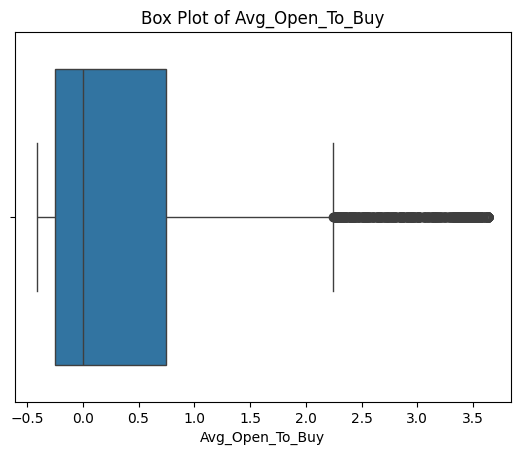

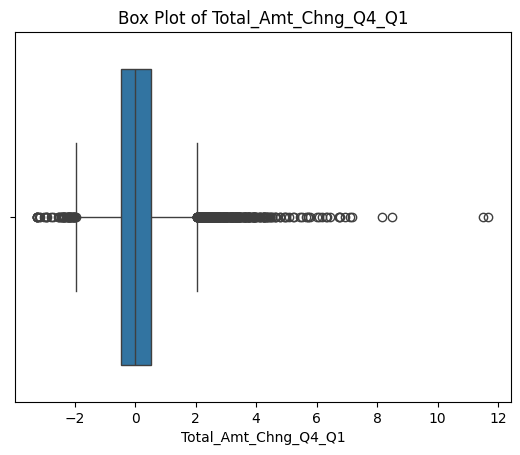

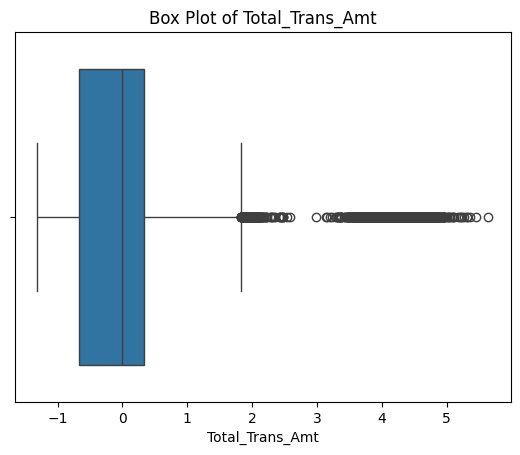

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for numeric variables (excluding 'Attrition_Flag')
numeric_columns = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt']

for column in numeric_columns:
    sns.boxplot(x=df[column])
    plt.xlabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()


In [201]:
# Specify columns with outliers
columns_with_outliers = [ 'Credit_Limit',  'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the DataFrame
df_cleaned = remove_outliers_iqr(df, columns_with_outliers)

In [202]:
# Check the number of rows removed
rows_removed = len(df) - len(df_cleaned)
print(f"Number of rows removed due to outliers: {rows_removed}")

Number of rows removed due to outliers: 2466


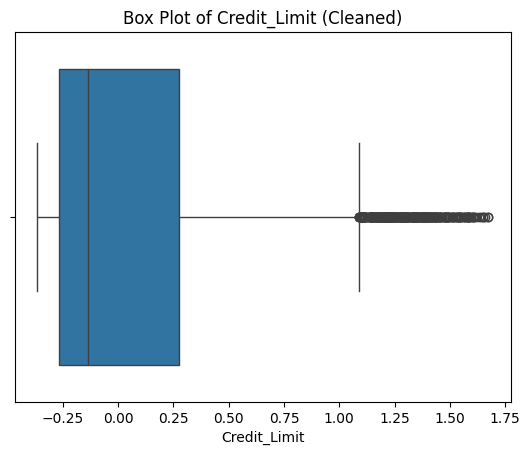

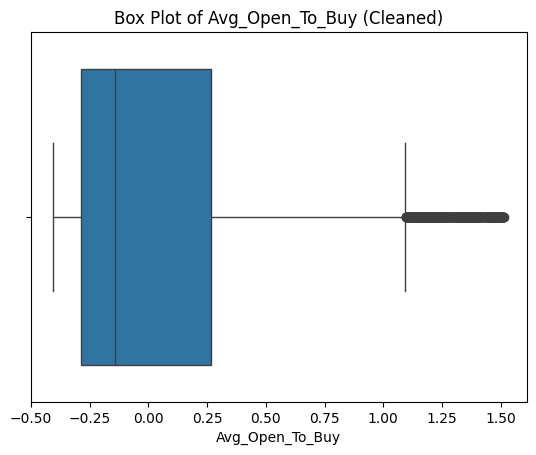

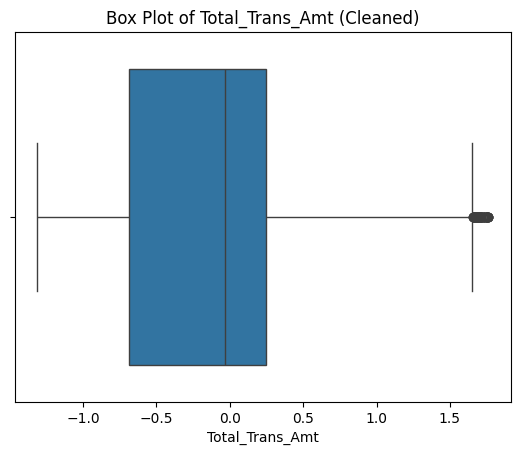

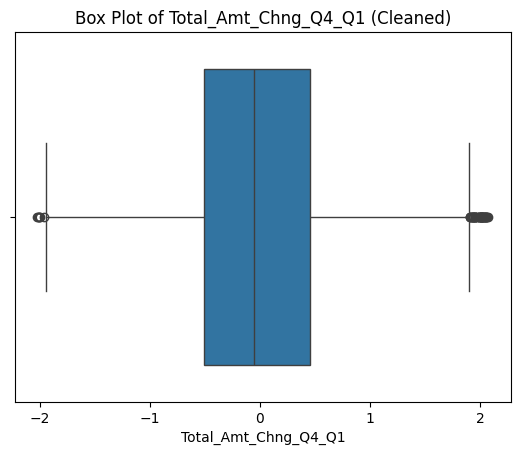

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for cleaned data
for column in columns_with_outliers:
    sns.boxplot(x=df_cleaned[column])
    plt.xlabel(column)
    plt.title(f'Box Plot of {column} (Cleaned)')
    plt.show()

In [205]:
from sklearn.model_selection import train_test_split
X = df_cleaned.drop(columns=['Attrition_Flag'])  # Features
y = df_cleaned['Attrition_Flag']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Logistic Regression

In [206]:
logR_Model = LogisticRegression(max_iter=1000)
logR_Model.fit(X_train, y_train)

y_pred_logR = logR_Model.predict(X_test)

# Accuracy
accuracy_logR = accuracy_score(y_test, y_pred_logR)
print(f"Logistic Regression Accuracy: {accuracy_logR:.4f}")

Logistic Regression Accuracy: 0.9026


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [207]:
coefficients = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': logR_Model.coef_[0]})
print(coefficients)

                    Variable  Coefficient
0               Customer_Age    -0.041646
1                     Gender     0.350197
2            Dependent_count    -0.335537
3            Education_Level    -0.081711
4             Marital_Status    -0.521378
5            Income_Category    -0.133590
6              Card_Category    -0.213148
7             Months_on_book     0.007698
8   Total_Relationship_Count     0.343763
9     Months_Inactive_12_mon    -0.560409
10     Contacts_Count_12_mon    -0.651571
11              Credit_Limit     0.243380
12       Total_Revolving_Bal     0.000784
13           Avg_Open_To_Buy    -0.015782
14      Total_Amt_Chng_Q4_Q1     0.040476
15           Total_Trans_Amt    -1.654236
16            Total_Trans_Ct     0.114213
17       Total_Ct_Chng_Q4_Q1     2.900321
18     Avg_Utilization_Ratio     0.140060


- Age: Coefficient: -0.026830
Interpretation: For every one year increase in the customer's age, the log odds of churn decreases by 0.026830. This suggests that older customers are less likely to churn than younger ones.


- Gender: Coefficient: 0.157964
Interpretation: If we code Gender as a binary variable (e.g., 0 for females and 1 for males), the positive coefficient suggests that being male is associated with a higher log odds of churn compared to being female.


- Education_Level: Coefficient: -0.058656
Interpretation: Higher education levels are associated with a decrease in the log odds of churn. This might imply that more educated customers are less likely to churn.


- Marital_Status: Coefficient: -0.372631
Interpretation: Assuming marital status is binary (e.g., 0 for single, 1 for married), the negative coefficient indicates that married customers are less likely to churn compared to single customers.


- Contacts_Count_12_mon: Coefficient: -0.670046
Interpretation: More frequent contacts with the customer over the last 12 months are associated with a substantial decrease in the log odds of churn. This could mean that engaging customers might reduce the likelihood of churn.


- Total_Trans_Ct: Coefficient: 0.127878
Interpretation: A higher total transaction count is associated with an increase in the log odds of churn.

- Avg_Utilization_Ratio: Coefficient: -0.081932
Interpretation: An increase in the average utilization ratio is associated with a decrease in the log odds of churn. This suggests that customers who use a larger proportion of their available credit are less likely to churn.

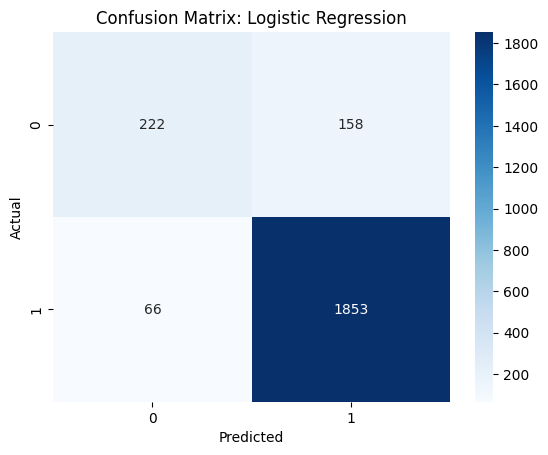

In [208]:
confusion_matrix_logR = confusion_matrix(y_test, y_pred_logR)
sns.heatmap(confusion_matrix_logR, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Classification Report

In [209]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred_logR)
print("Accuracy of Decision Tree:", accuracy_logR)
print("\n Classification Report:\n", classification_rep)

Accuracy of Decision Tree: 0.9025663331883428

 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.58      0.66       380
           1       0.92      0.97      0.94      1919

    accuracy                           0.90      2299
   macro avg       0.85      0.77      0.80      2299
weighted avg       0.90      0.90      0.90      2299



#SHAP on Logistic Regression

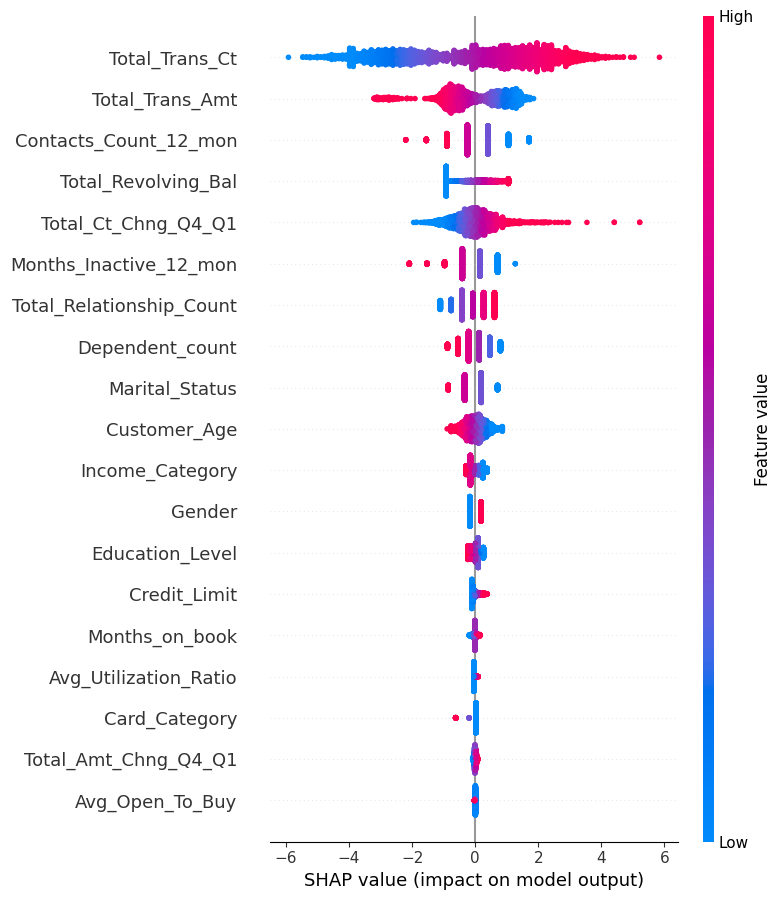

In [210]:
explainer = shap.LinearExplainer(logR_Model, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

- This plot shows the distribution of feature values across two categories which might be churn vs. non-churn, depicted by two different colors.
The width of the 'violin' at different levels indicates the density of points, showing where values are concentrated.
- This can illustrate, for example, if higher values of "Total_Trans_Ct" are associated with one category over the other.
- Points outside the 'violin' could indicate outliers or individual observations.
Such a plot helps to visualize both the distribution of data points and their relationship to the outcome (churn).

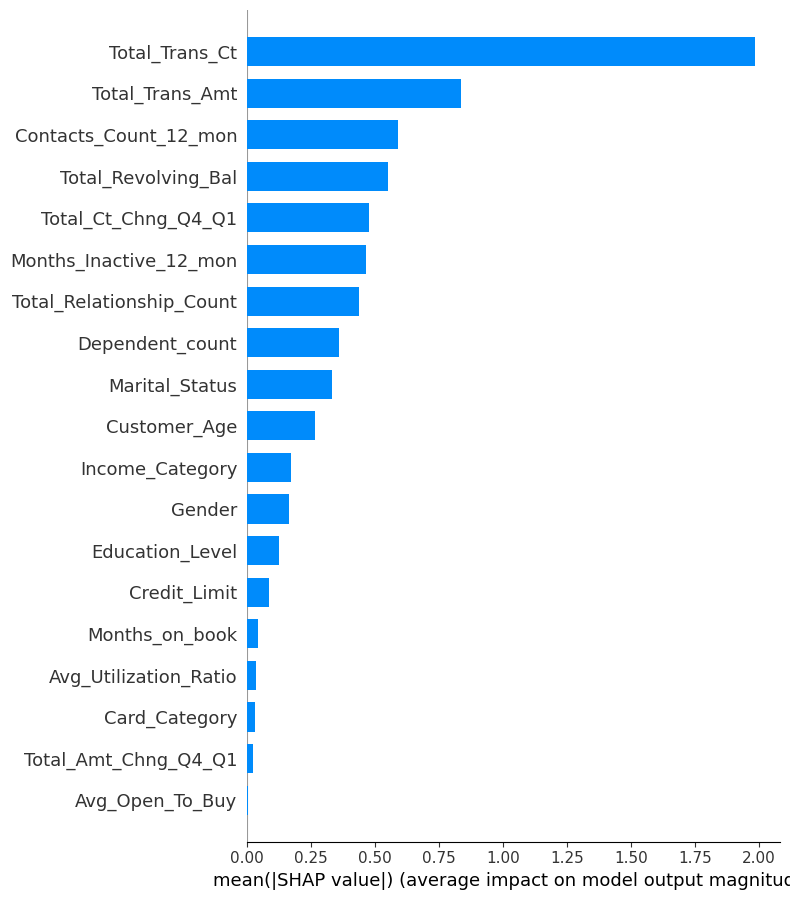

In [211]:
explainer = shap.Explainer(logR_Model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

- This chart shows the importance or influence of different features on the model's predictions, often derived from the magnitude of the model's coefficients.
- Longer bars represent greater influence. For example, "Total_Trans_Ct" appears to be the most influential feature, likely having a significant impact on the model's predictions.
- Features like "Marital_Status" and "Dependent_count" have shorter bars, indicating they have less influence on the model's output.
- This chart can help in understanding which features are most predictive of churn and could be a focus for interventions or further analysis.

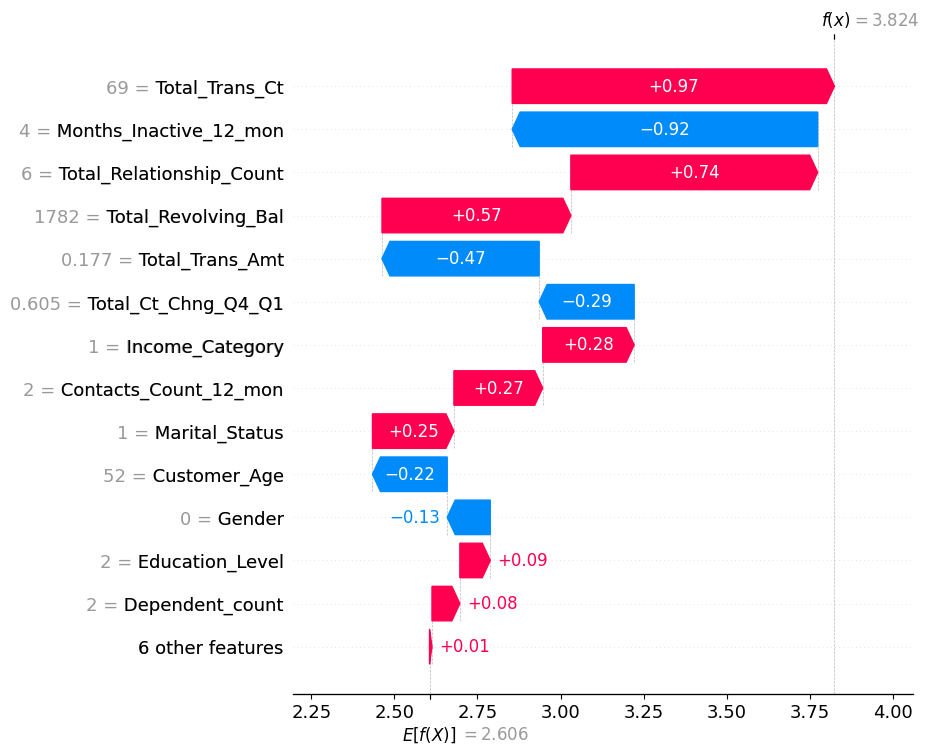

In [212]:
sample_ind = 20
# Create the SHAP explainer
explainer = shap.Explainer(logR_Model, X_train)

# Calculate SHAP values for a single instance
shap_values = explainer(X_train.iloc[[sample_ind]])

# Generate the SHAP waterfall plot for the selected instance
shap.plots.waterfall(shap_values[0], max_display=14)

- Each bar represents the impact of an individual feature on the model's prediction for this particular instance, relative to the base value.
- Red bars represent features that push the prediction higher (increase the probability of the positive class), while blue bars push the prediction lower (decrease the probability of the positive class).

#XGBoost Model

In [213]:
import xgboost as XGB
import shap
from sklearn.metrics import accuracy_score


# Create an XGBoost classifier
XGBoost_Model = XGB.XGBClassifier(objective='binary:logistic', max_depth=4, learning_rate=0.1, n_estimators=100, seed=42)

# Fit the model
XGBoost_Model.fit(X_train, y_train)

# Make predictions
y_pred = XGBoost_Model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


<Figure size 2000x1500 with 0 Axes>

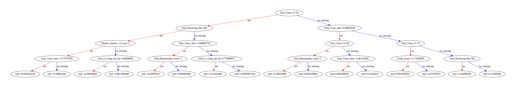

In [214]:
from xgboost import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(XGBoost_Model, num_trees=1)

# plot to a file with higher resolution
plt.savefig('xgboost_nodes.png', dpi=300)
plt.show()

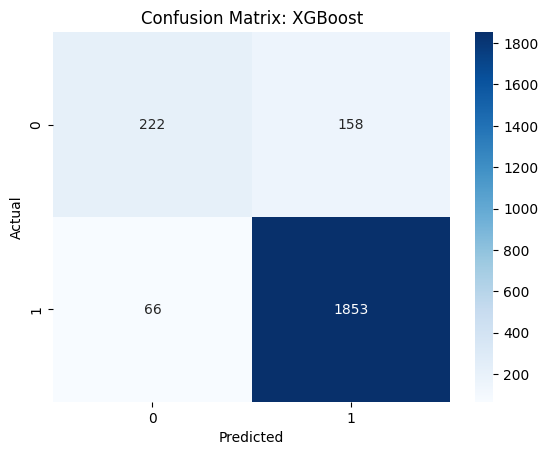

In [215]:
confusion_matrix_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_logR, annot=True, fmt="d", cmap = 'Blues')
plt.title("Confusion Matrix: XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [216]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print("Accuracy of Decision Tree:", accuracy)
print("\n Classification Report:\n", classification_rep)

Accuracy of Decision Tree: 0.966072205306655

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       380
           1       0.98      0.98      0.98      1919

    accuracy                           0.97      2299
   macro avg       0.95      0.93      0.94      2299
weighted avg       0.97      0.97      0.97      2299



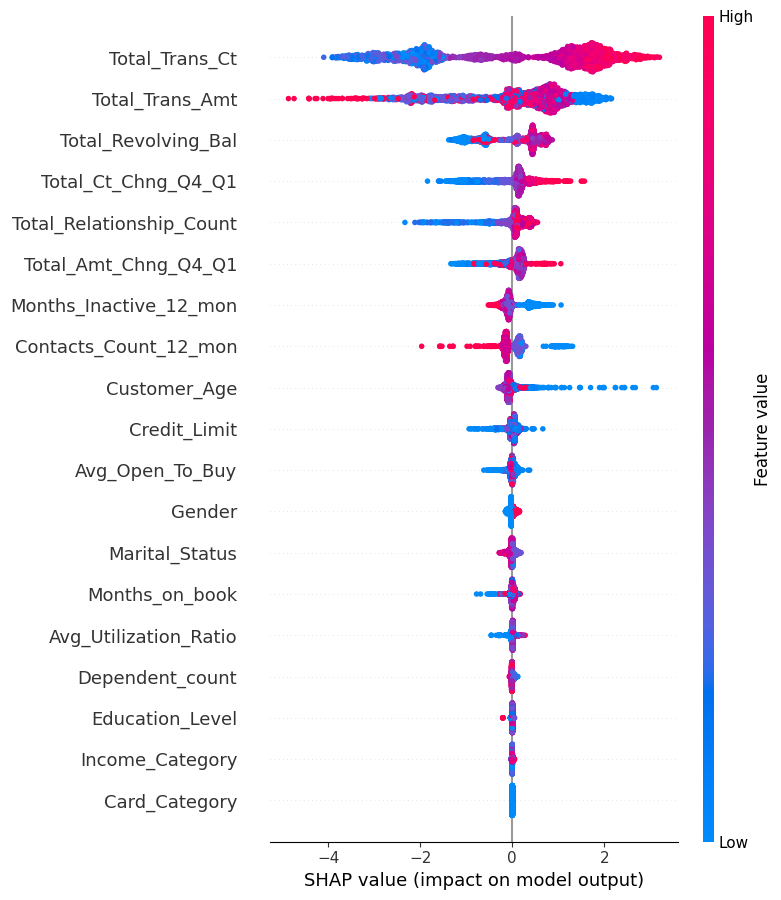

In [217]:
explainer = shap.Explainer(XGBoost_Model, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

- This plot might be showing the marginal effect one or two features have on the predicted outcome of the model.
- It provides insight into the relationship between the value of a feature and the likelihood of a particular outcome.
- The "Total_Trans_Ct" feature, for example, might show an increasing likelihood of the target outcome as the feature value increases.

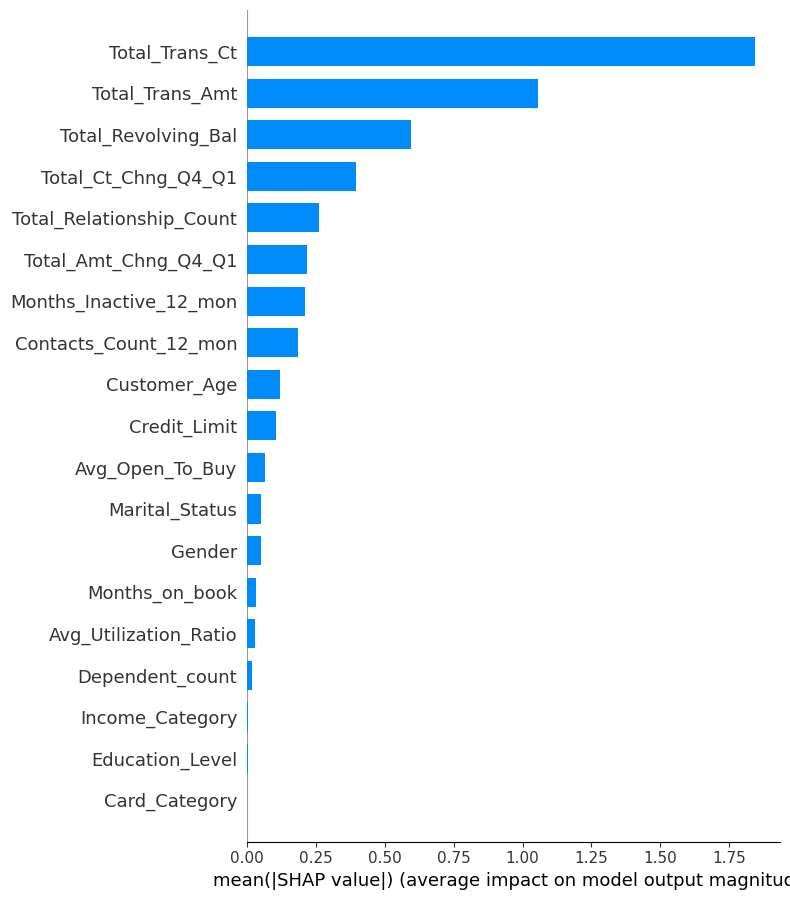

In [218]:
explainer = shap.Explainer(XGBoost_Model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

- This bar chart ranks features based on their importance, which is typically computed from the average gain of the feature when it is used in trees.
- The longer the bar, the more important the feature. "Total_Trans_Ct" is the most important feature, implying it has the most significant influence on the model's decisions.

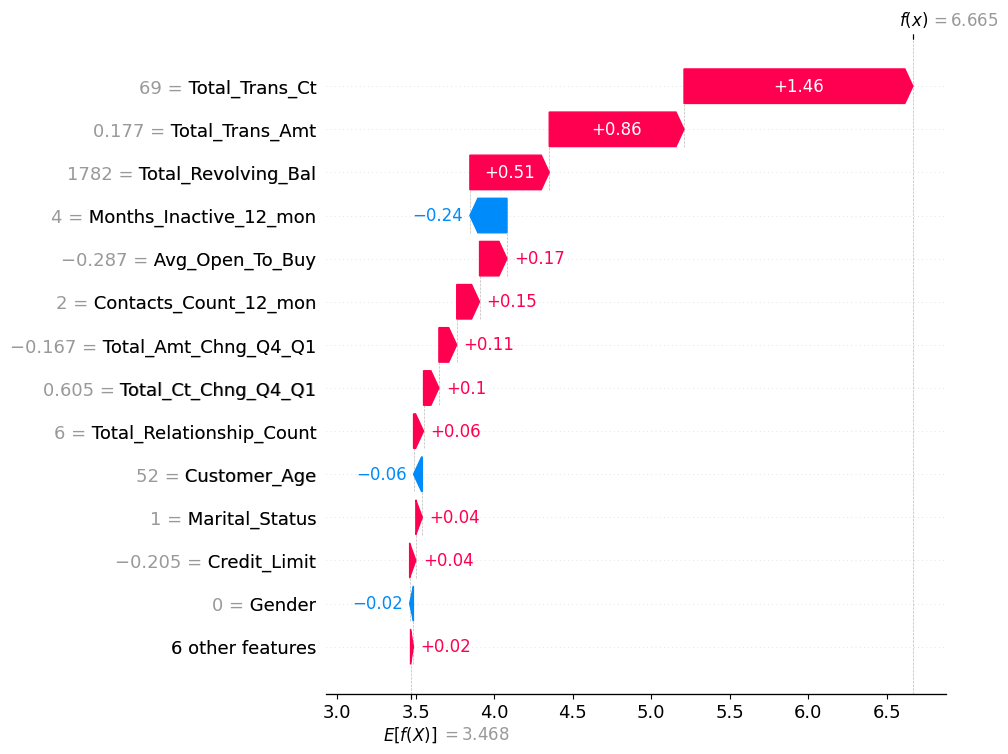

In [ ]:
sample_ind = 20
# Create the SHAP explainer
explainer = shap.Explainer(XGBoost_Model, X_train)

# Calculate SHAP values for a single instance
shap_values = explainer(X_train.iloc[[sample_ind]])

# Generate the SHAP waterfall plot for the selected instance
shap.plots.waterfall(shap_values[0], max_display=14)

- SHAP values (SHapley Additive exPlanations) explain the contribution of each feature to the model's prediction for an individual sample.
- In the plot, each point represents a SHAP value for a feature and an observation. For instance, for "Total_Trans_Ct", positive SHAP values (red) indicate a higher likelihood of the target outcome (possibly churn), while negative values (blue) indicate a lower likelihood.
- Features are ordered by the sum of SHAP value magnitudes over all samples. "Total_Trans_Ct" with the highest SHAP values is the most impactful feature.
- The color represents the feature value (red is high, blue is low).

#AutoML

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [ ]:
#minimum memory size (in gigabytes) that should be allocated
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

2


In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:40688..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmppqtuogs4
  JVM stdout: /tmp/tmppqtuogs4/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmppqtuogs4/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:40688
Connecting to H2O server at http://127.0.0.1:40688 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_k82dc6
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:40688
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

#H2o AutoML Execution

In [ ]:
# Convert pandas DataFrame to H2O Frame
hf = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
hf.types

{'Attrition_Flag': 'int',
 'Customer_Age': 'int',
 'Gender': 'int',
 'Dependent_count': 'int',
 'Education_Level': 'int',
 'Marital_Status': 'int',
 'Income_Category': 'int',
 'Card_Category': 'int',
 'Months_on_book': 'int',
 'Total_Relationship_Count': 'int',
 'Months_Inactive_12_mon': 'int',
 'Contacts_Count_12_mon': 'int',
 'Credit_Limit': 'real',
 'Total_Revolving_Bal': 'int',
 'Avg_Open_To_Buy': 'real',
 'Total_Amt_Chng_Q4_Q1': 'real',
 'Total_Trans_Amt': 'real',
 'Total_Trans_Ct': 'int',
 'Total_Ct_Chng_Q4_Q1': 'real',
 'Avg_Utilization_Ratio': 'real'}

In [ ]:
pct_rows=0.80
hf_train, hf_test = hf.split_frame([pct_rows])

In [ ]:
print(hf_train.shape)
print(hf_test.shape)

(8104, 20)
(2023, 20)


In [ ]:
#Display all columns in X
X = hf.columns
print(X)

['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [ ]:
#Seperate Dependent variable from Independent variable
y_output ='Attrition_Flag'
X.remove(y_output)
print('Features except target variable: ',X)
print('Target Variable: ',y_output)

Features except target variable:  ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Target Variable:  Attrition_Flag


In [ ]:
#Set the AutoML
aml = H2OAutoML(max_runtime_secs=run_time, sort_metric='MAE',max_models=10 ,seed=1, exclude_algos=['DeepLearning'])

#Pass the data through H20AutoML
aml.train(x=X,y=y_output,training_frame=hf_train)

AutoML progress: |
02:02:40.732: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██████
02:03:00.214: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
02:03:02.399: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████████
02:03:33.652: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
02:03:42.904: _response par

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240403_20240


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  9/10
# GBM base models (used / total)      4/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      2/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.0068839709126835074
RMSE: 0.0829696987621596
MAE: 0.04199155901914451
RMSLE: 0.061936322688091475
Mean Residual Deviance: 0.0068839709126835074
R^2: 0.9496360003386715
Null degrees of freedom: 8103
Residual degrees of freedom: 8094
Null deviance: 1107.690029615103
Residual deviance: 55.78770027638714
AIC: -17326.091462864322

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.026676115203477287
RMSE: 0.16332824374087077
MAE: 0.07848211926507748
RMSLE: 0.1164605689195402
Mean Residual Deviance: 0.026676115203477287
R^2: 0.8048341757810009
Null degrees of freedom: 8103
Residual degrees of freedom: 8094
Null deviance: 1107.7348462616872
Residual deviance: 216.18323760897994
AIC: -6348.632272901494

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     -1257.66   117.857     -1082.54      -1295.65      -1374.55      -1337.01      -1198.56
loglikelihood           0          0           0             0             0             0             0
mae                     0.0785056  0.00238366  0.0818691     0.0798893     0.0758038     0.077716      0.07725
mean_residual_deviance  0.0266337  0.00213255  0.0303383     0.026352      0.0249648     0.0255776     0.0259359
mse                     0.0266337  0.00213255  0.0303383     0.026352      0.0249648     0.0255776     0.0259359
null_deviance           221.547    12.3385     232.009       224.419       220.738       229.639       200.929
r2                      0.80508    0.014676    0.780307      0.806485      0.814959      0.817175      0.806475
residual_deviance       43.2179    4.64066     50.9684       43.4282       40.8424       41.9728       38.8779
rmse                    0.163098   0.00639499  0.174179      0.162333      0.158002      0.15993       0.161046
rmsle                   0.116296   0.00457543  0.124279      0.115823      0.113246      0.113549      0.114582

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
# Get the AutoML leaderboard
leaderboard = aml.leaderboard

# Print the leaderboard
print(leaderboard)

model_id                                                      mae      rmse        mse     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240403_20240     0.0784821  0.163328  0.0266761  0.116461                 0.0266761
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_20240  0.0796668  0.165008  0.0272278  0.117632                 0.0272278
GBM_3_AutoML_1_20240403_20240                           0.0798515  0.167695  0.0281218  0.119512                 0.0281218
GBM_4_AutoML_1_20240403_20240                           0.0800417  0.167762  0.028144   0.119004                 0.028144
GBM_2_AutoML_1_20240403_20240                           0.0806666  0.168206  0.0282931  0.1203                   0.0282931
DRF_1_AutoML_1_20240403_20240                           0.083778   0.179627  0.032266   0.128594                 0.032266
XRT_1_AutoML_1_20240403_20240                           0.088638   0.180821  0.0326963  0.12927                  0.0326963
XGBoost_3_AutoML_1

model_id                                                      mae      rmse        mse     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  ---------  --------  ---------  --------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20240403_20240     0.0784821  0.163328  0.0266761  0.116461                 0.0266761                3552                   0.299711  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_20240  0.0796668  0.165008  0.0272278  0.117632                 0.0272278                2797                   0.114293  StackedEnsemble
GBM_3_AutoML_1_20240403_20240                           0.0798515  0.167695  0.0281218  0.119512                 0.0281218                1476                   0.034394  GBM
GBM_4_AutoML_1_20240403_20240                           0.0800417  0.167762  0.028144   0.119004                 0.028144                 2658                   0.03397   GBM
GBM_2_AutoML_1_20240403_20240                           0.0806666  0.168206  0.0282931  0.1203                   0.0282931                1240                   0.019392  GBM
DRF_1_AutoML_1_20240403_20240                           0.083778   0.179627  0.032266   0.128594                 0.032266                 1818                   0.014496  DRF
XGBoost_3_AutoML_1_20240403_20240                       0.0914952  0.176295  0.03108    0.128097                 0.03108                  1084                   0.003997  XGBoost
GLM_1_AutoML_1_20240403_20240                           0.220744   0.293256  0.0859991  0.202413                 0.0859991                 115                   0.000984  GLM
[8 rows x 9 columns]

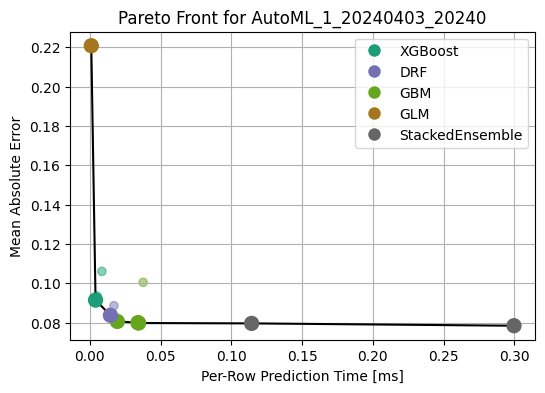

In [ ]:
pf = aml.pareto_front()
fig = pf.figure()

# Adjust the size of the figure
fig.set_size_inches(6, 4)

# Display the plot
pf

In [ ]:
best_model = aml.leader
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240403_20240


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  9/10
# GBM base models (used / total)      4/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      2/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.0068839709126835074
RMSE: 0.0829696987621596
MAE: 0.04199155901914451
RMSLE: 0.061936322688091475
Mean Residual Deviance: 0.0068839709126835074
R^2: 0.9496360003386715
Null degrees of freedom: 810

In [ ]:
print("Best Model ID:", best_model.model_id)
print("Best Model MSE:", best_model.mse())

Best Model ID: StackedEnsemble_AllModels_1_AutoML_1_20240403_20240
Best Model MSE: 0.0068839709126835074


In [ ]:
best_model.algo

'stackedensemble'

In [ ]:
predictions = best_model.predict(hf_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
target_column = "Attrition_Flag"

# Add the actual labels to the predictions DataFrame
predictions[target_column] = hf_test[target_column]

# Evaluate model performance
perf = best_model.model_performance(hf_test)
print(perf)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.02309360783223262
RMSE: 0.15196581139267024
MAE: 0.07181122210999383
RMSLE: 0.10849009096903324
Mean Residual Deviance: 0.02309360783223262
R^2: 0.8186521226340489
Null degrees of freedom: 2022
Residual degrees of freedom: 2013
Null deviance: 257.99149433476003
Residual deviance: 46.71836864460659
AIC: -1860.0421151781968


###Without Regularization - Is above to Original Model (H2O parsed df)

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

#without regularization
churn_glm = H2OGeneralizedLinearEstimator(family = 'binomial', lambda_ = 0, compute_p_values = True)

###With Regularization (ElasticNet) -

In [ ]:
# With regularization
# 0 = L1 regularization (Ridge)
# 1 = L2 regularization (Lasso)
# between 0 and 1 = combination of L1 and L2 regularization (Elastic Net)
churn_glm_regularization = H2OGeneralizedLinearEstimator(family = 'binomial', lambda_ = 0.001, alpha = 0.5)

In [ ]:
churn_glm_regularization.train(x = X, y = y_output, training_frame = hf_train)

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712109744704_13


GLM Model: summary
    family    link    regularization                              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.001 )  19                            16                             5                       py_470_sid_8020

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.0713318065826887
RMSE: 0.26708015010982883
LogLoss: 0.23891392829855532
AUC: 0.9235668484702653
AUCPR: 0.9823430605608557
Gini: 0.8471336969405305
Null degrees of freedom: 8103
Residual degrees of freedom: 8087
Null deviance: 7216.2242366952705
Residual deviance: 3872.3169498629845
AIC: 3906.3169498629845

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5423067240531787
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      807   517   0.3905   (517.0/1324.0)
1      256   6524  0.0378   (256.0/6780.0)
Total  1063  7041  0.0954   (773.0/8104.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.542307     0.944071  237
max f2                       0.193751     0.96929   340
max f0point5                 0.711289     0.94464   182
max accuracy                 0.576509     0.904615  226
max precision                0.999414     1         0
max recall                   0.00995602   1         398
max specificity              0.999414     1         0
max absolute_mcc             0.692205     0.639028  189
max min_per_class_accuracy   0.836891     0.847432  128
max mean_per_class_accuracy  0.834857     0.848716  129
max tns                      0.999414     1324      0
max fns                      0.999414     6654      0
max fps                      0.00458199   1324      399
max tps                      0.00995602   6780      398
max tnr                      0.999414     1         0
max fnr                      0.999414     0.981416  0
max fpr                      0.00458199   1         399
max tpr                      0.00995602   1         398

Gains/Lift Table: Avg response rate: 83.66 %, avg score: 83.66 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101185                   0.999378           1.19528   1.19528            1                0.999575  1                           0.999575            0.0120944       0.0120944                  19.528    19.528             0.0120944
2        0.0201135                   0.998923           1.19528   1.19528            1                0.99913   1                           0.999354            0.0119469       0.0240413                  19.528    19.528             0.0240413
3        0.0301086                   0.99858            1.19528   1.19528            1                0.998752  1                           0.999154            0.0119469       0.0359882                  19.528    19.528             0.0359882
4        0.0401037                   0.998273           1.19528   1.19528            1                0.998414  1                           0.99897             0.0119469       0.0479351                  19.528    19.528  

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse        mse        mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  ---------  --------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20240403_20240     0.151966  0.0230936  0.0718112  0.10849                  0.0230936                3552                   0.153561  StackedEnsemble
GBM_3_AutoML_1_20240403_20240                           0.152134  0.0231447  0.0714953  0.10847                  0.0231447                1476                   0.035889  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_20240  0.153735  0.0236346  0.0739573  0.109476                 0.0236346                2797                   0.069184  StackedEnsemble
GBM_4_AutoML_1_20240403_20240                           0.155296  0.0241168  0.0717392  0.110735                 0.0241168                2658                   0.031598  GBM
GBM_2_AutoML_1_20240403_20240                           0.156175  0.0243906  0.0725109  0.111708                 0.0243906                1240                   0.028201  GBM
DRF_1_AutoML_1_20240403_20240                           0.165312  0.0273281  0.0744984  0.118346                 0.0273281                1818                   0.021365  DRF
GBM_1_AutoML_1_20240403_20240                           0.167218  0.027962   0.0924438  0.117664                 0.027962                 3902                   0.049669  GBM
XGBoost_2_AutoML_1_20240403_20240                       0.167643  0.0281041  0.083794   0.119731                 0.0281041                1094                   0.006858  XGBoost
XRT_1_AutoML_1_20240403_20240                           0.169195  0.0286268  0.0802658  0.120376                 0.0286268                3241                   0.023903  DRF
XGBoost_3_AutoML_1_20240403_20240                       0.169935  0.0288778  0.0875518  0.121527                 0.0288778                1084                   0.005626  XGBoost
XGBoost_1_AutoML_1_20240403_20240                       0.185761  0.0345072  0.104347   0.130134                 0.0345072                4389                   0.011167  XGBoost
GLM_1_AutoML_1_20240403_20240                           0.285667  0.0816054  0.21455    0.19565                  0.0816054                 115                   0.001794  GLM
[12 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

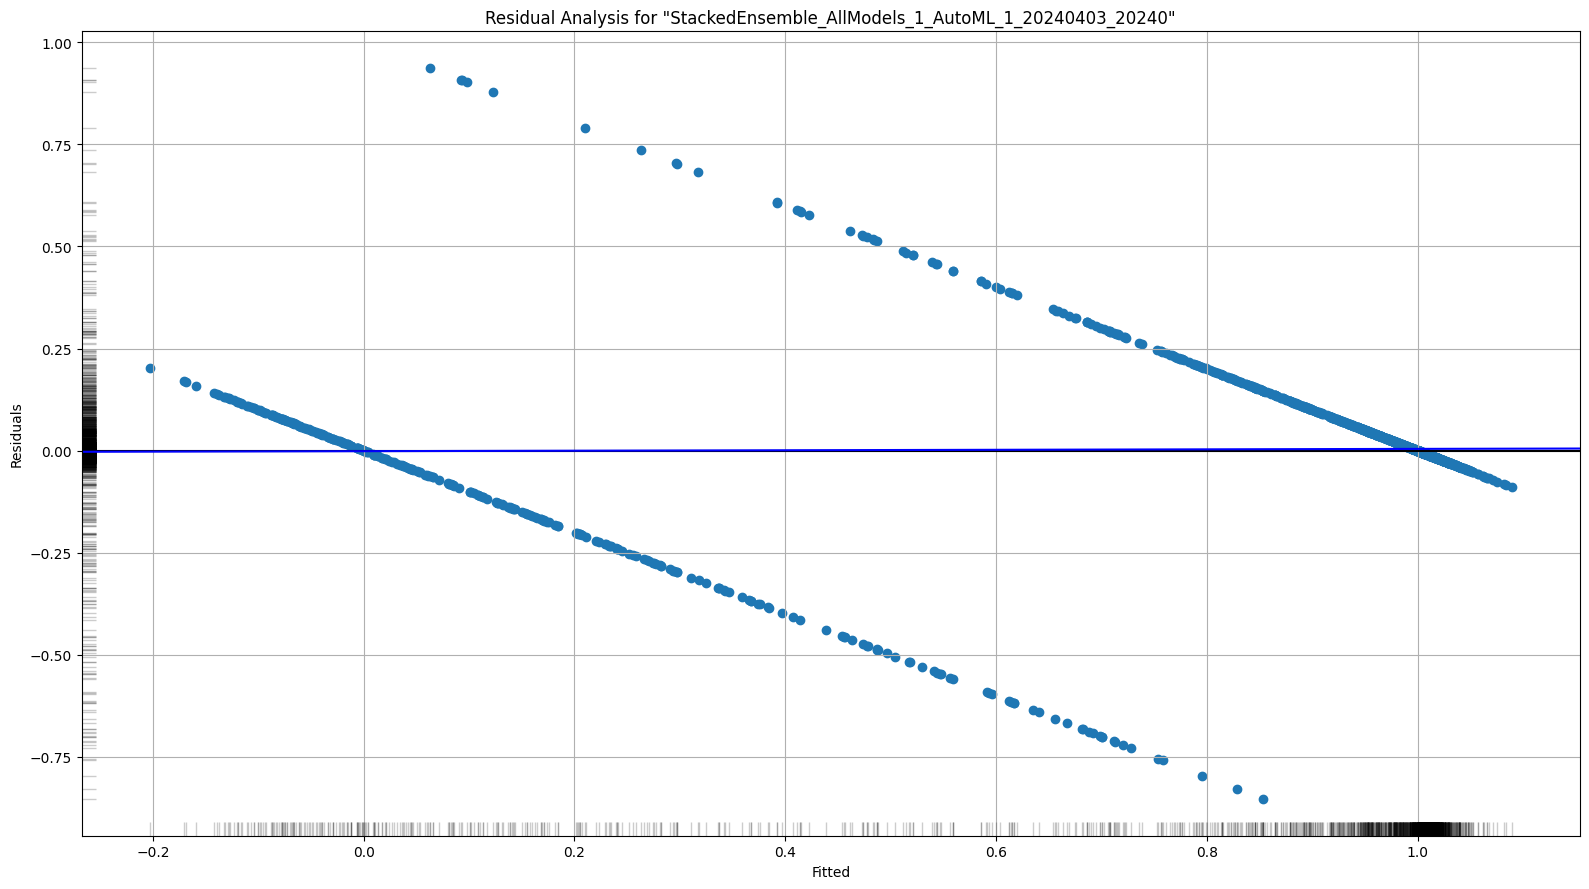

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

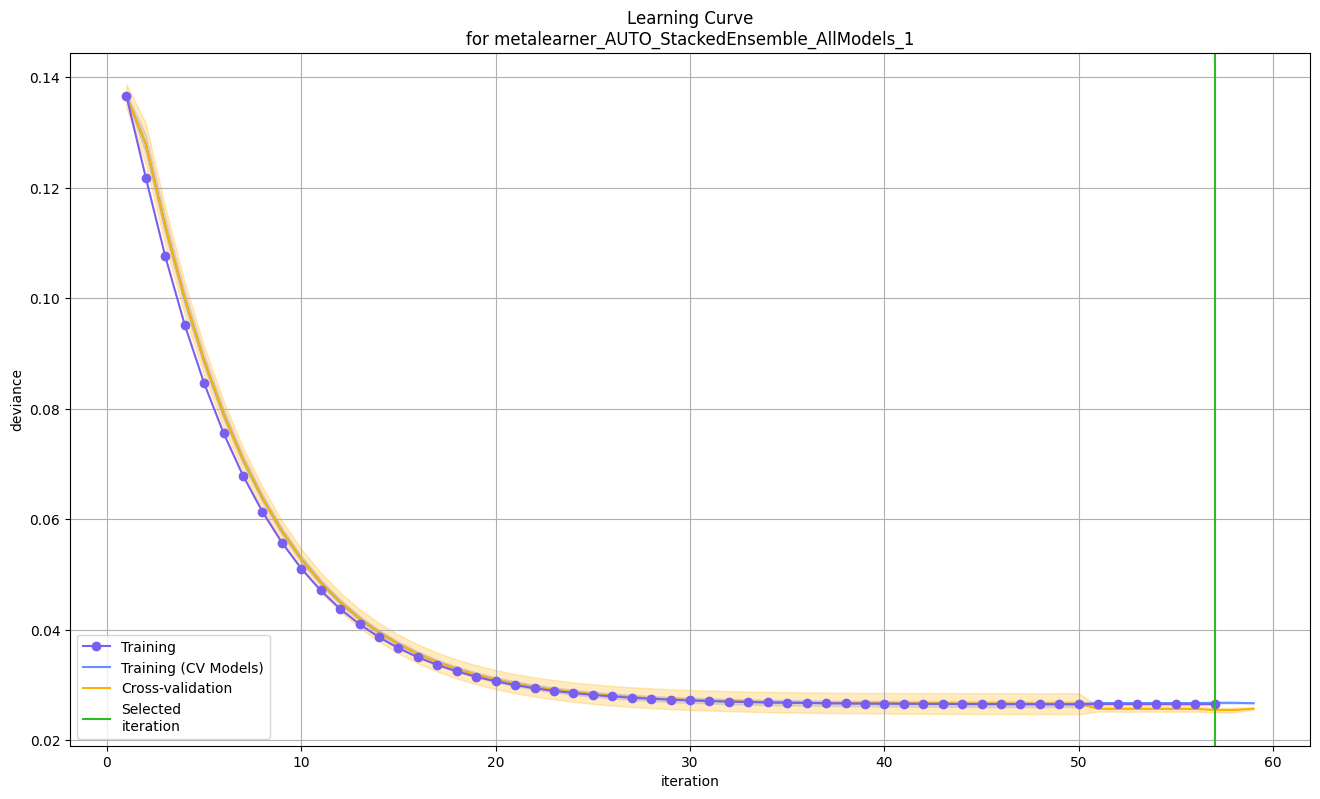

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

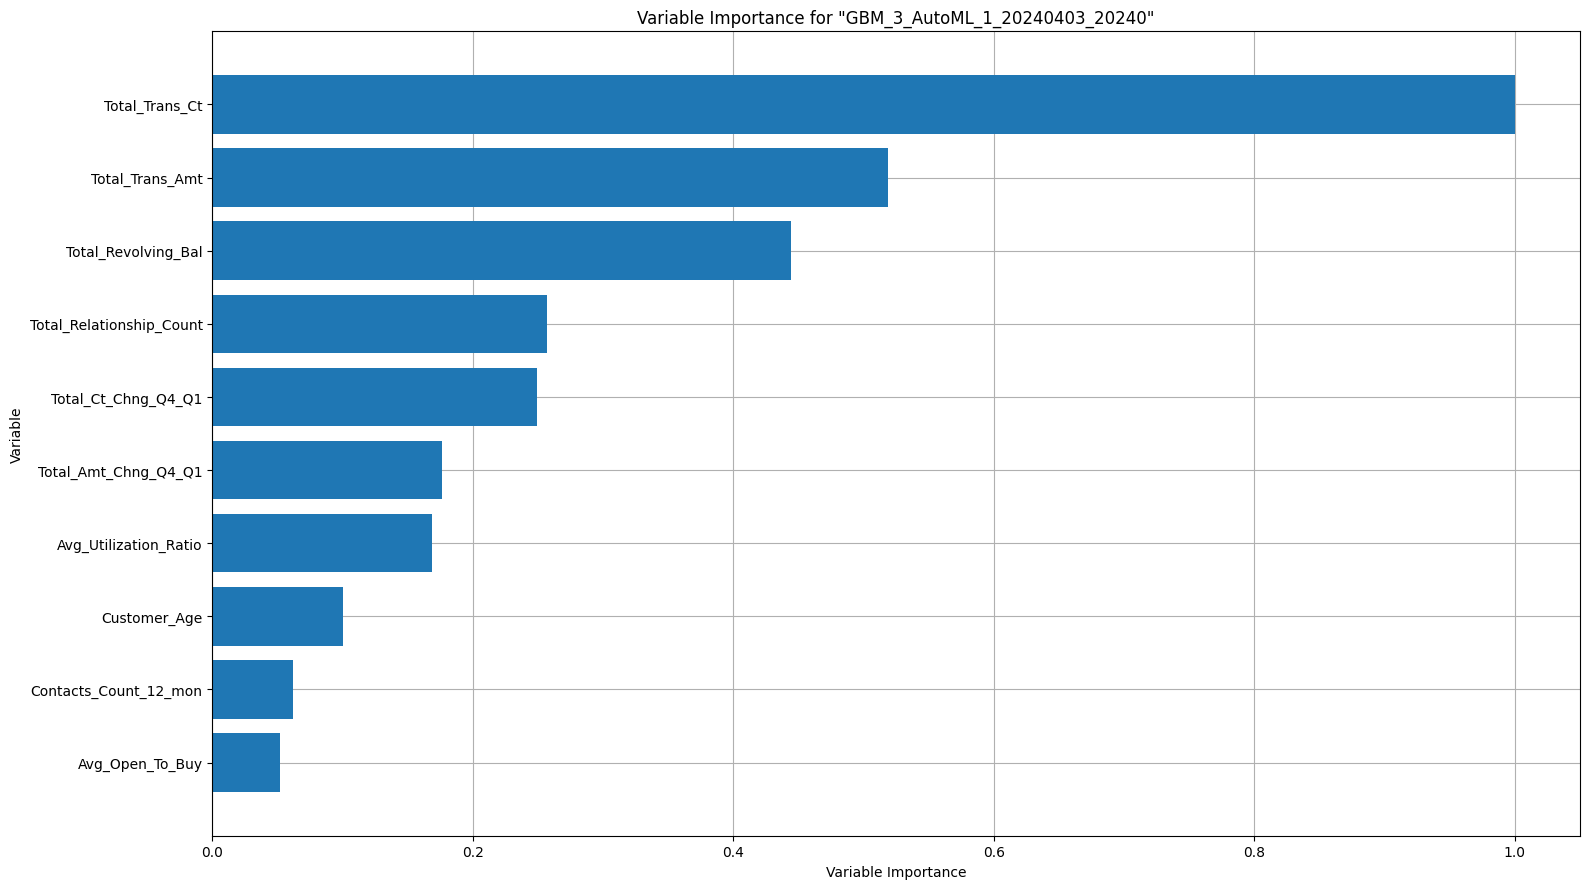

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

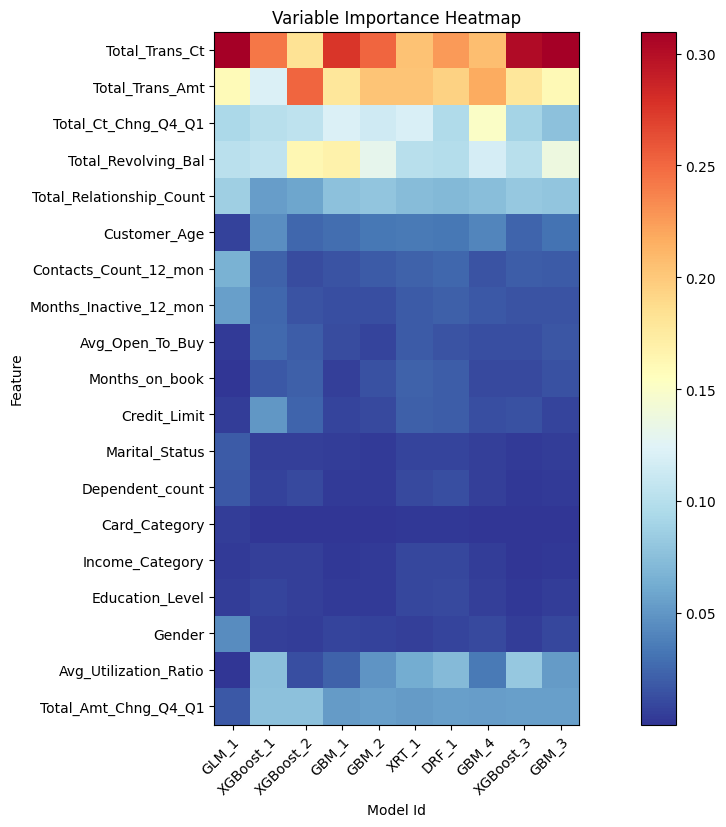

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

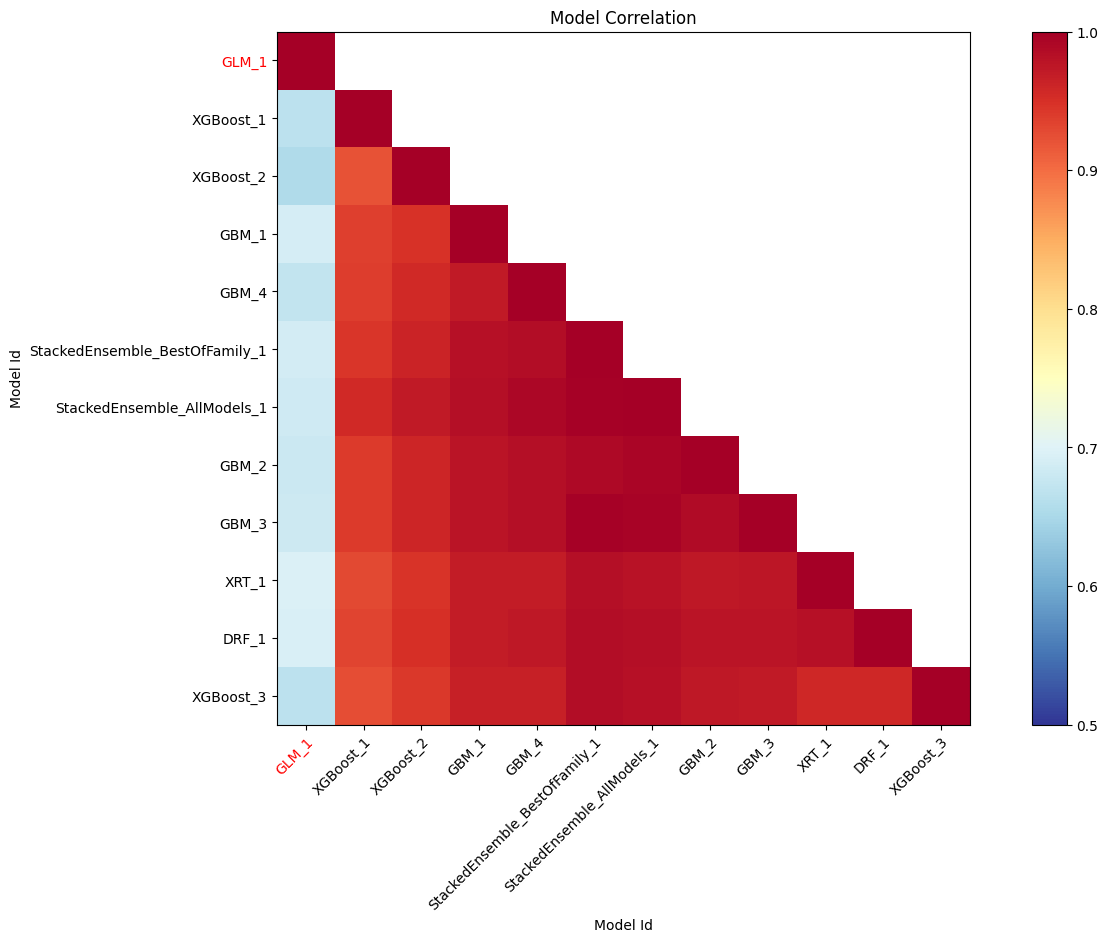

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

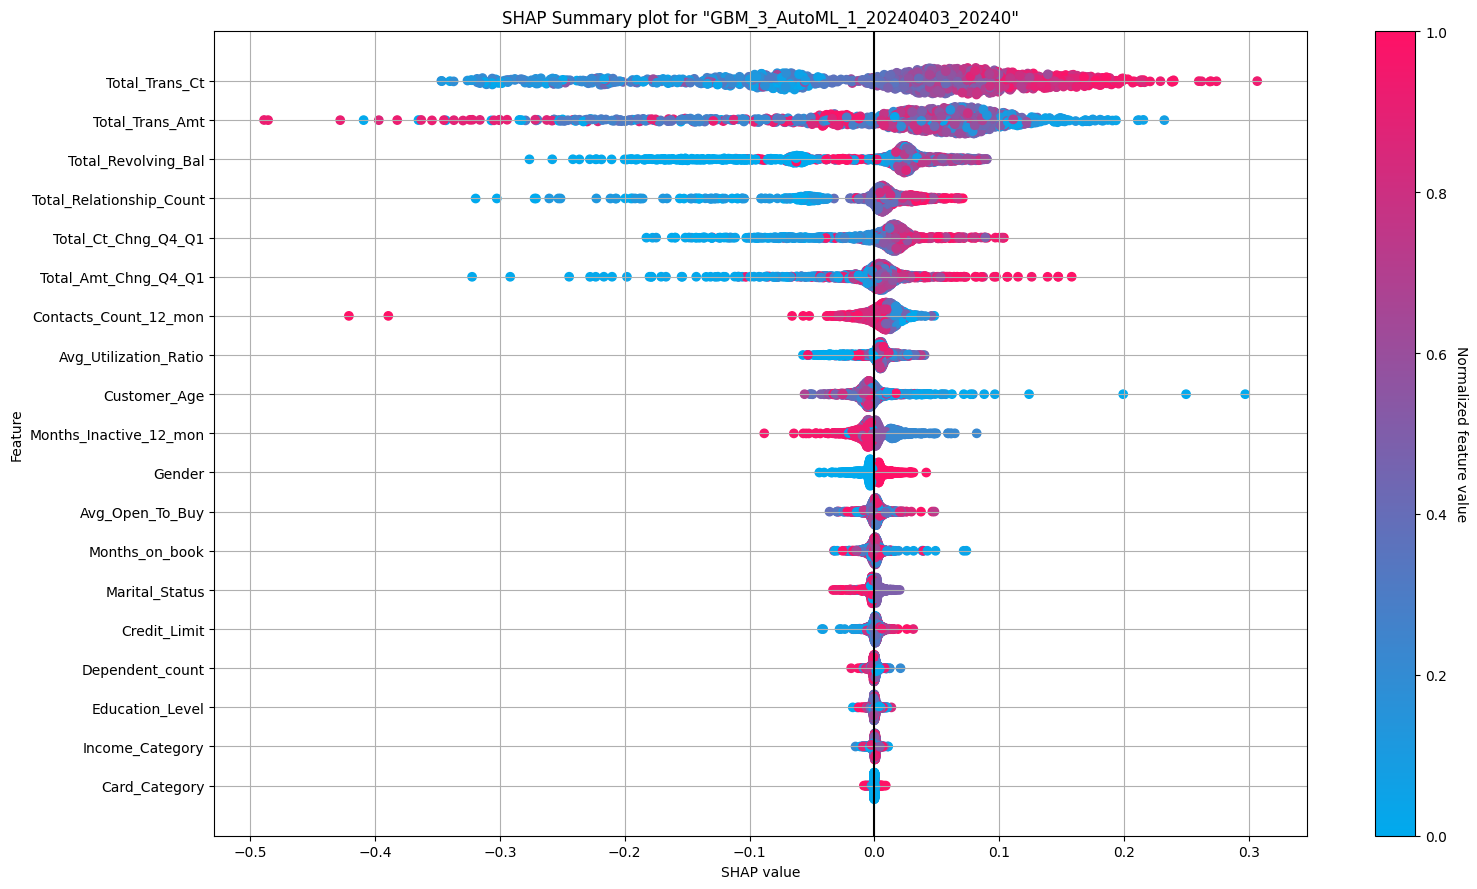

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

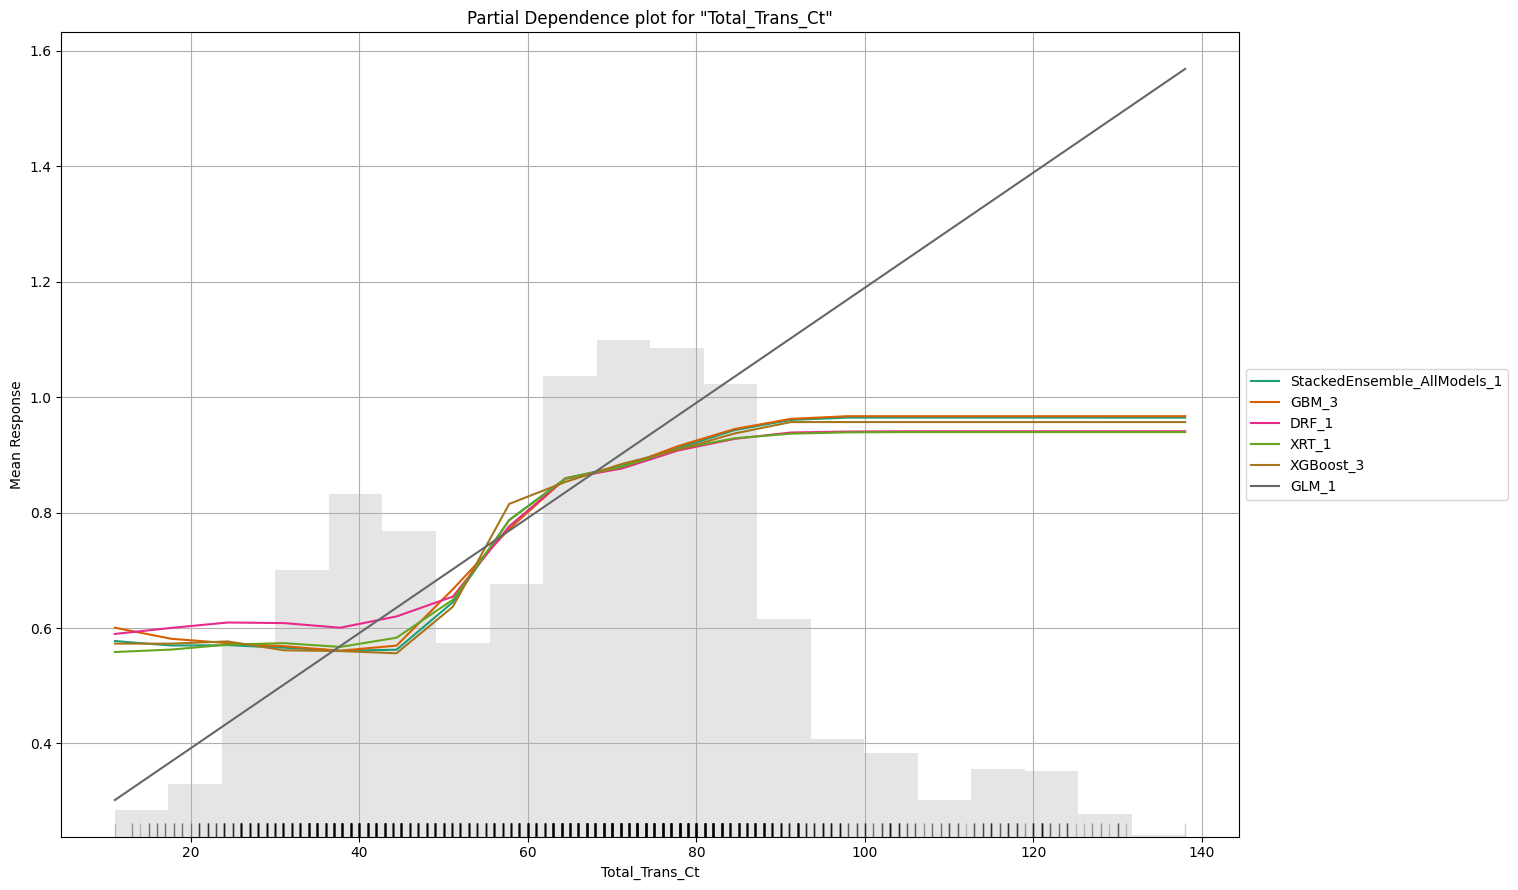

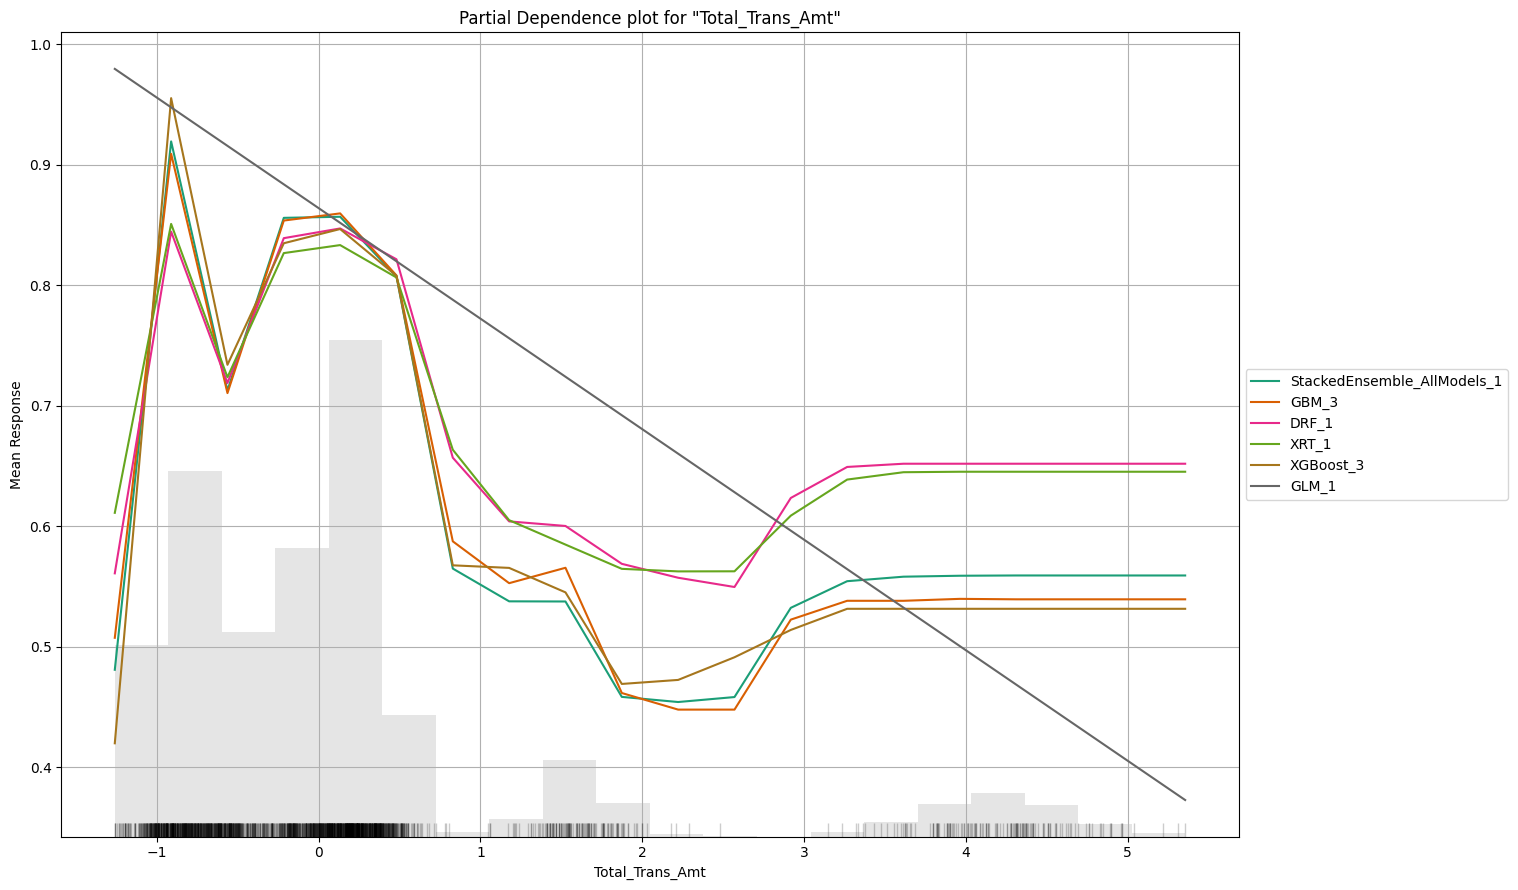

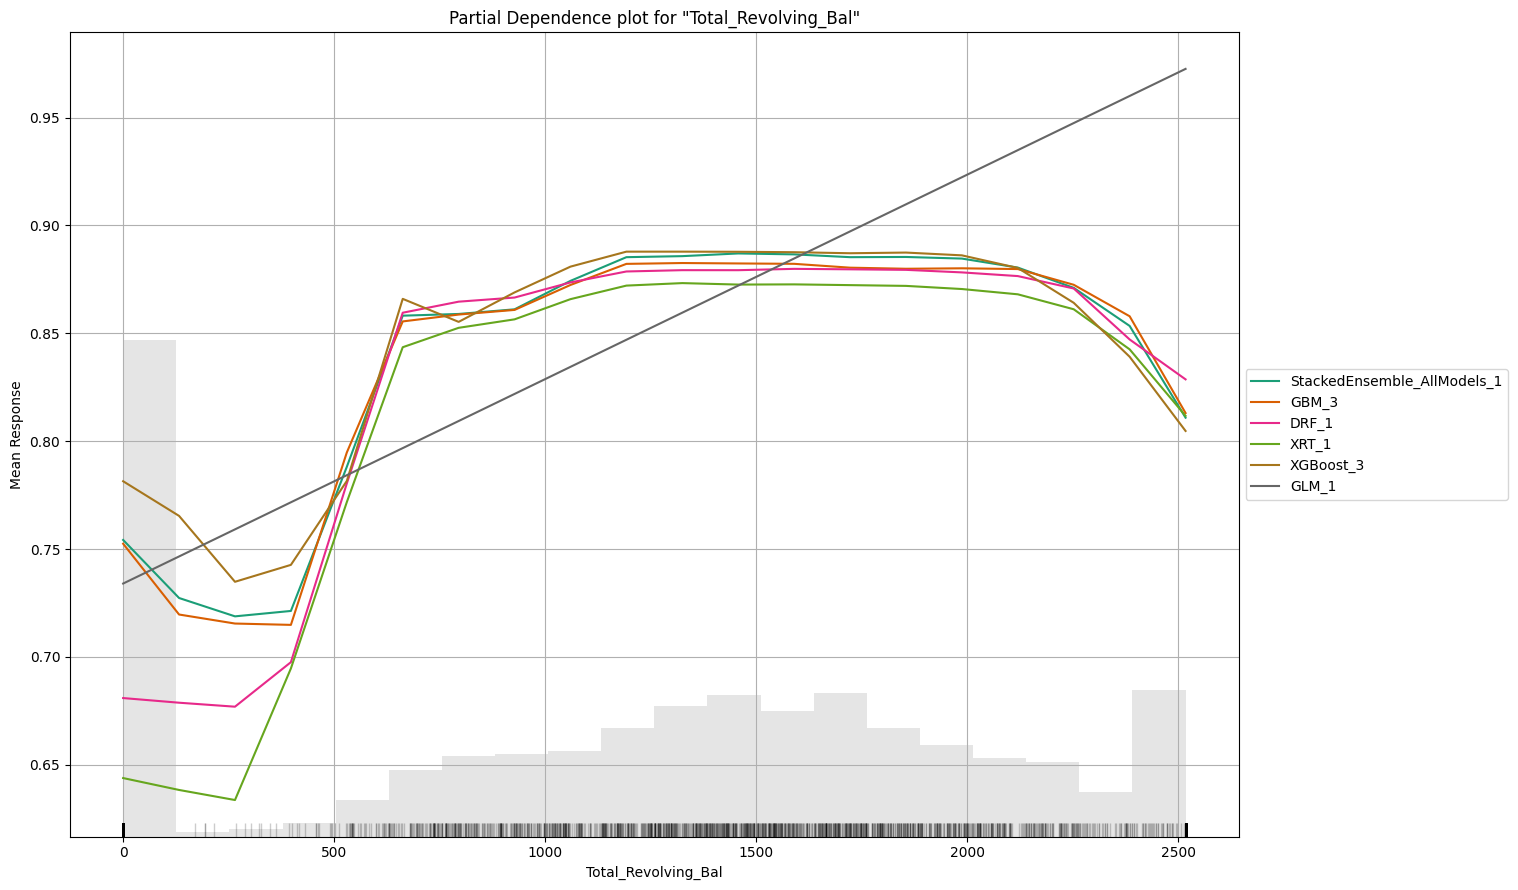

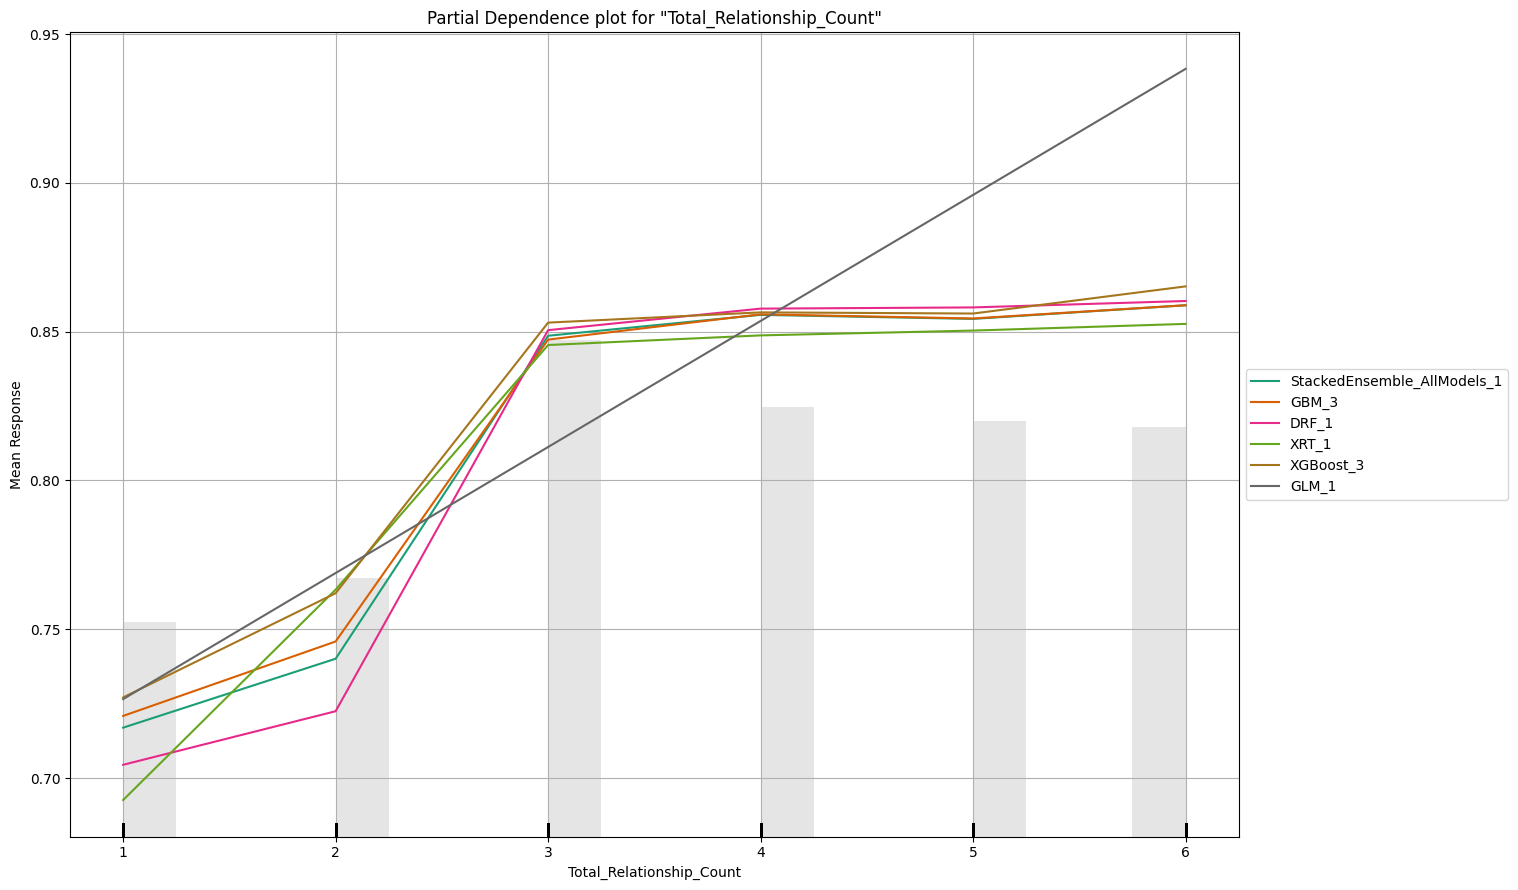

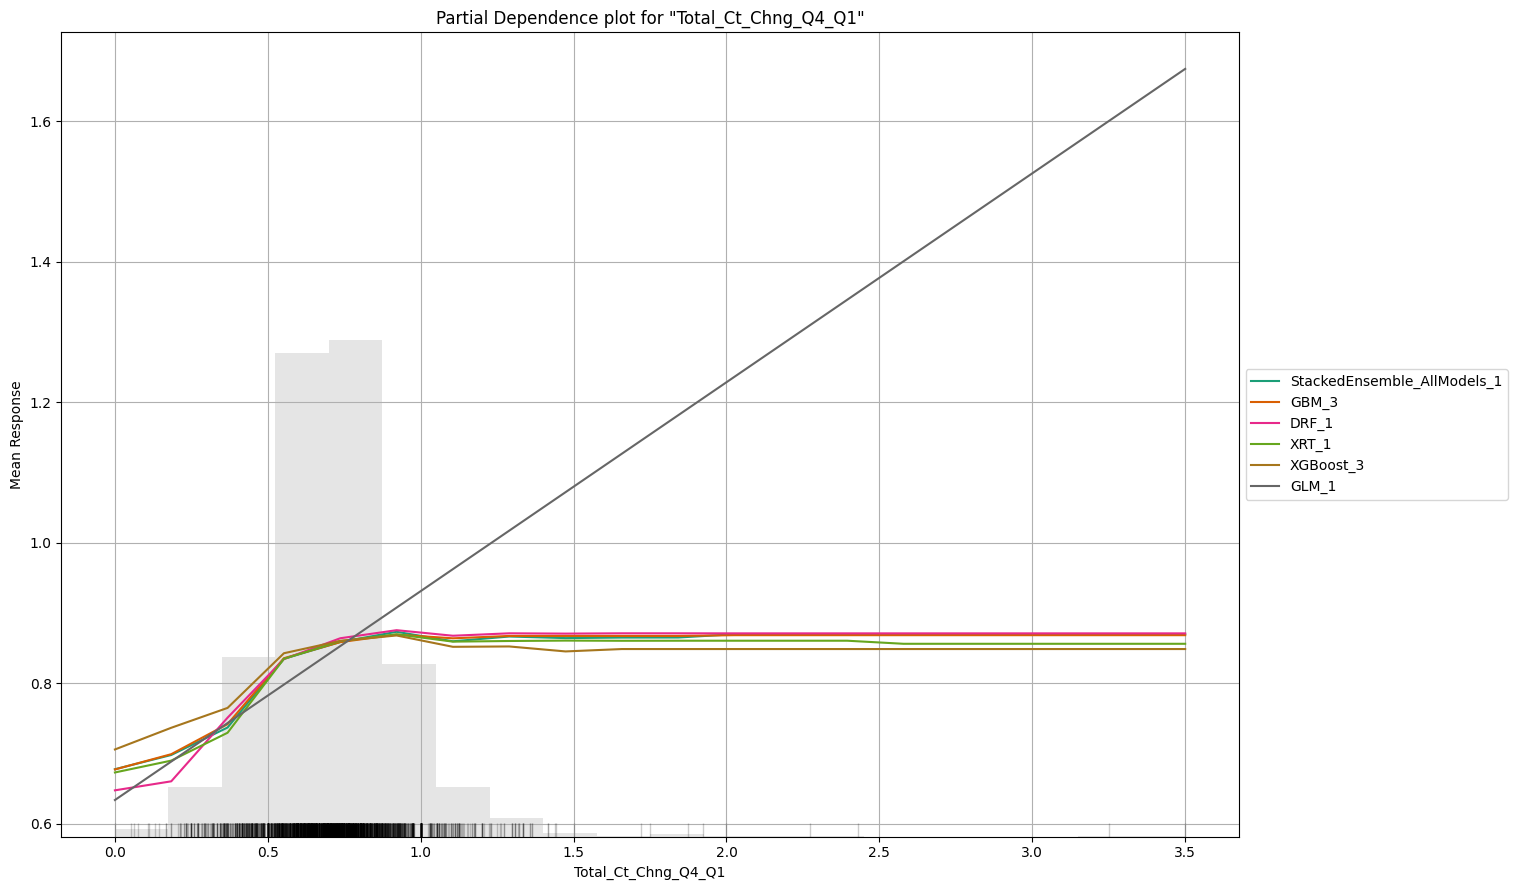

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

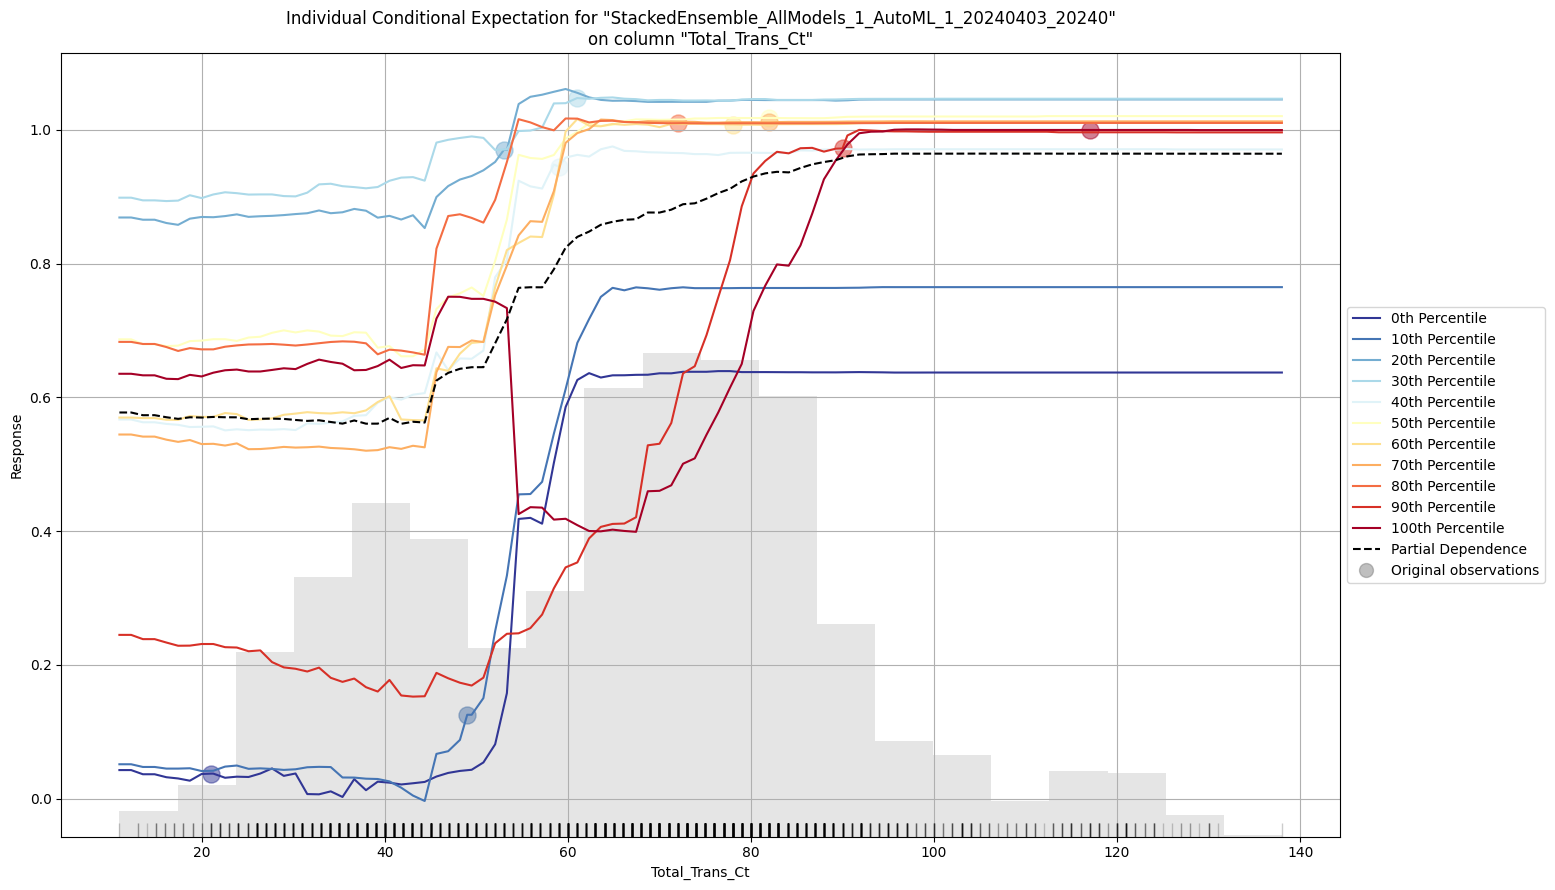

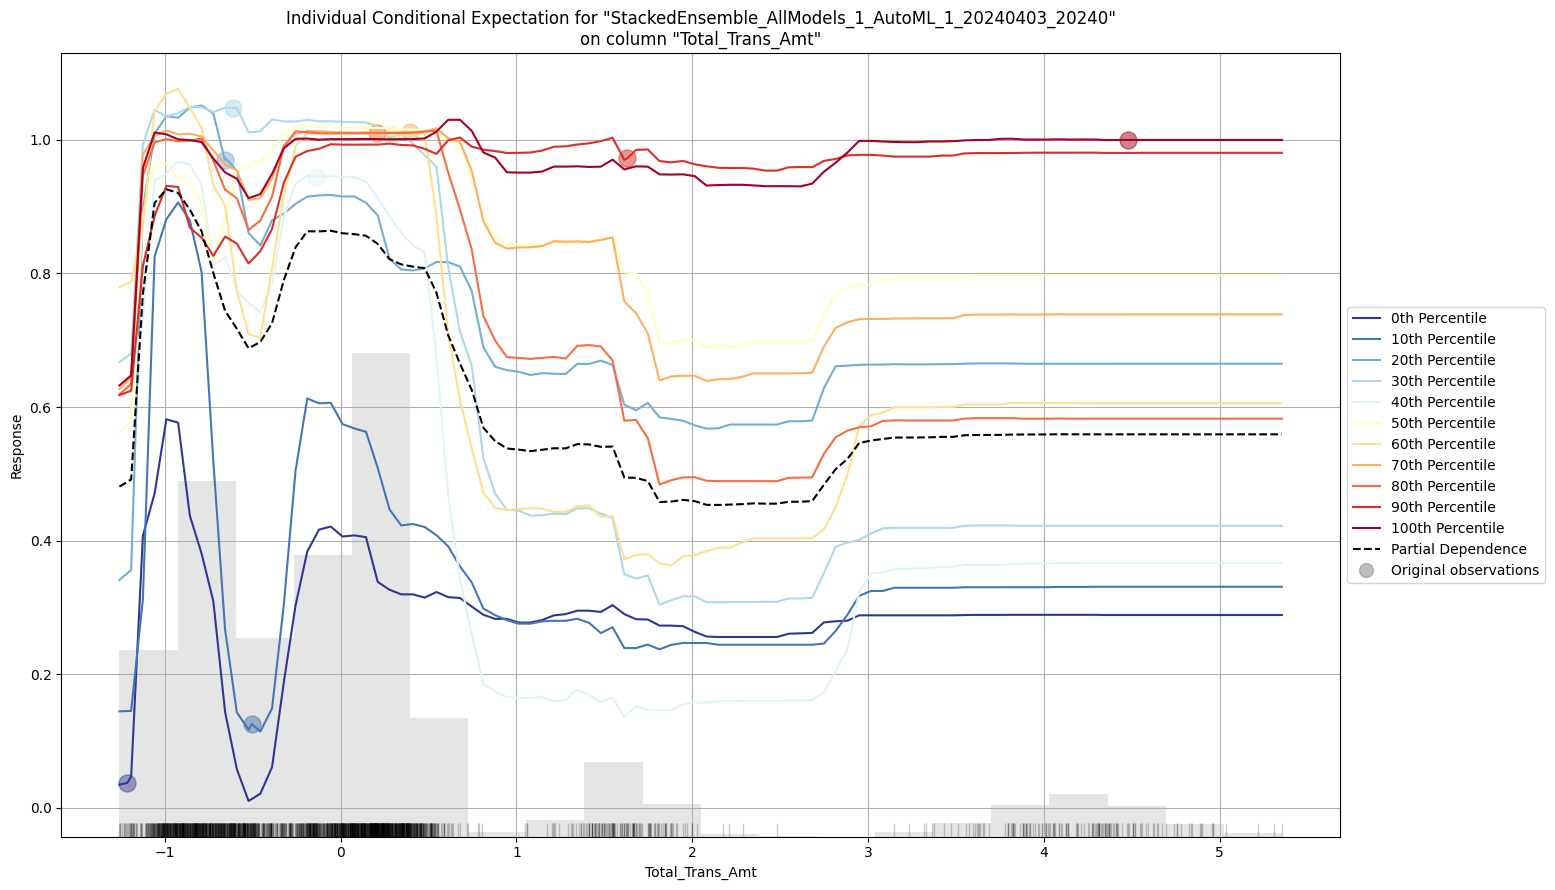

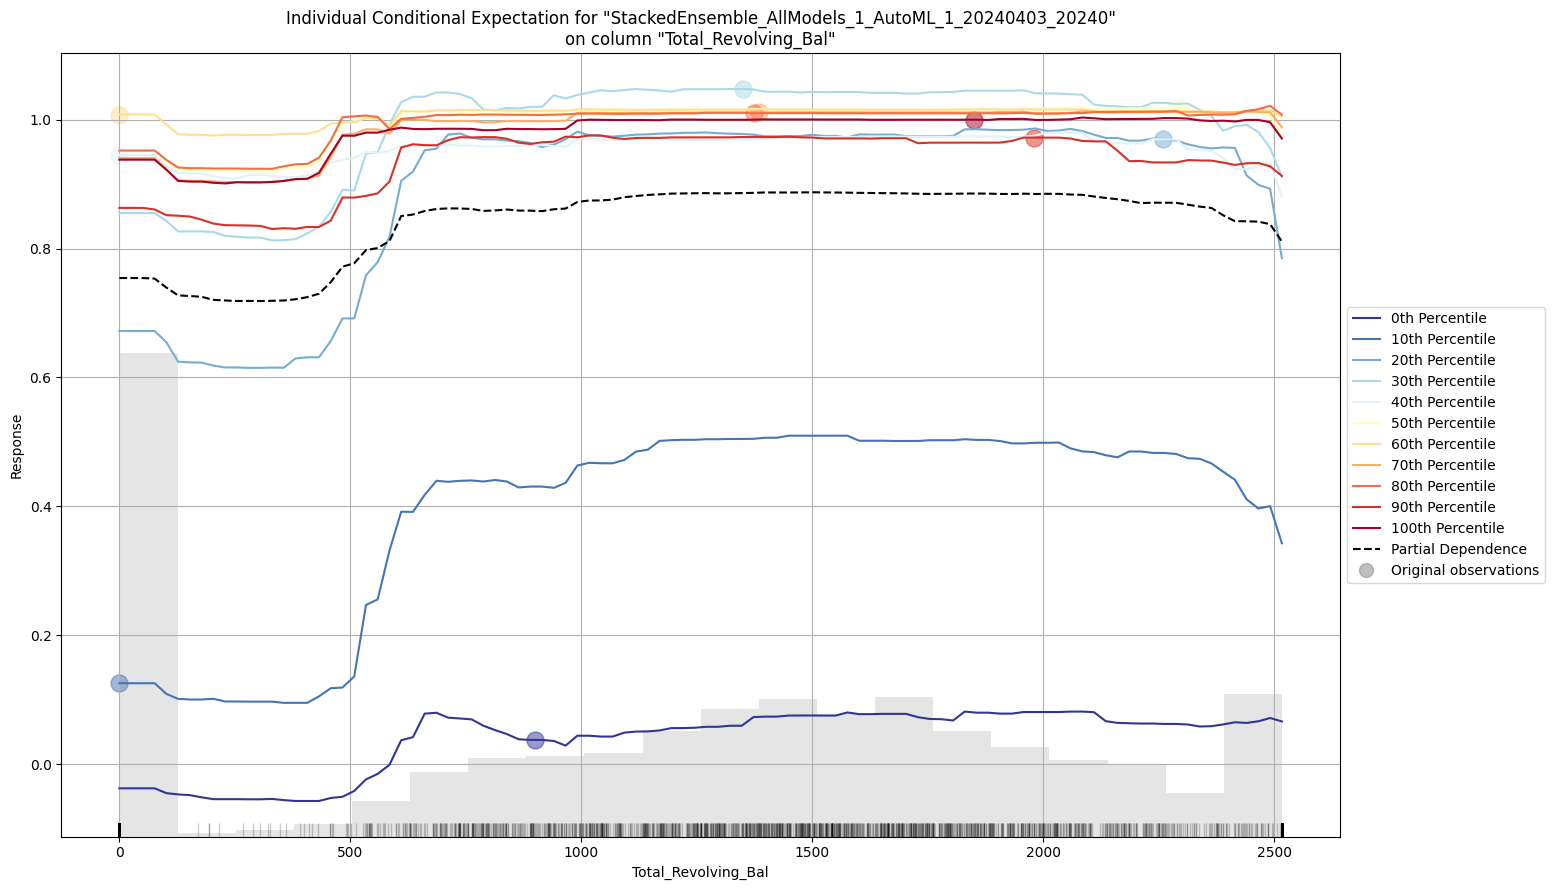

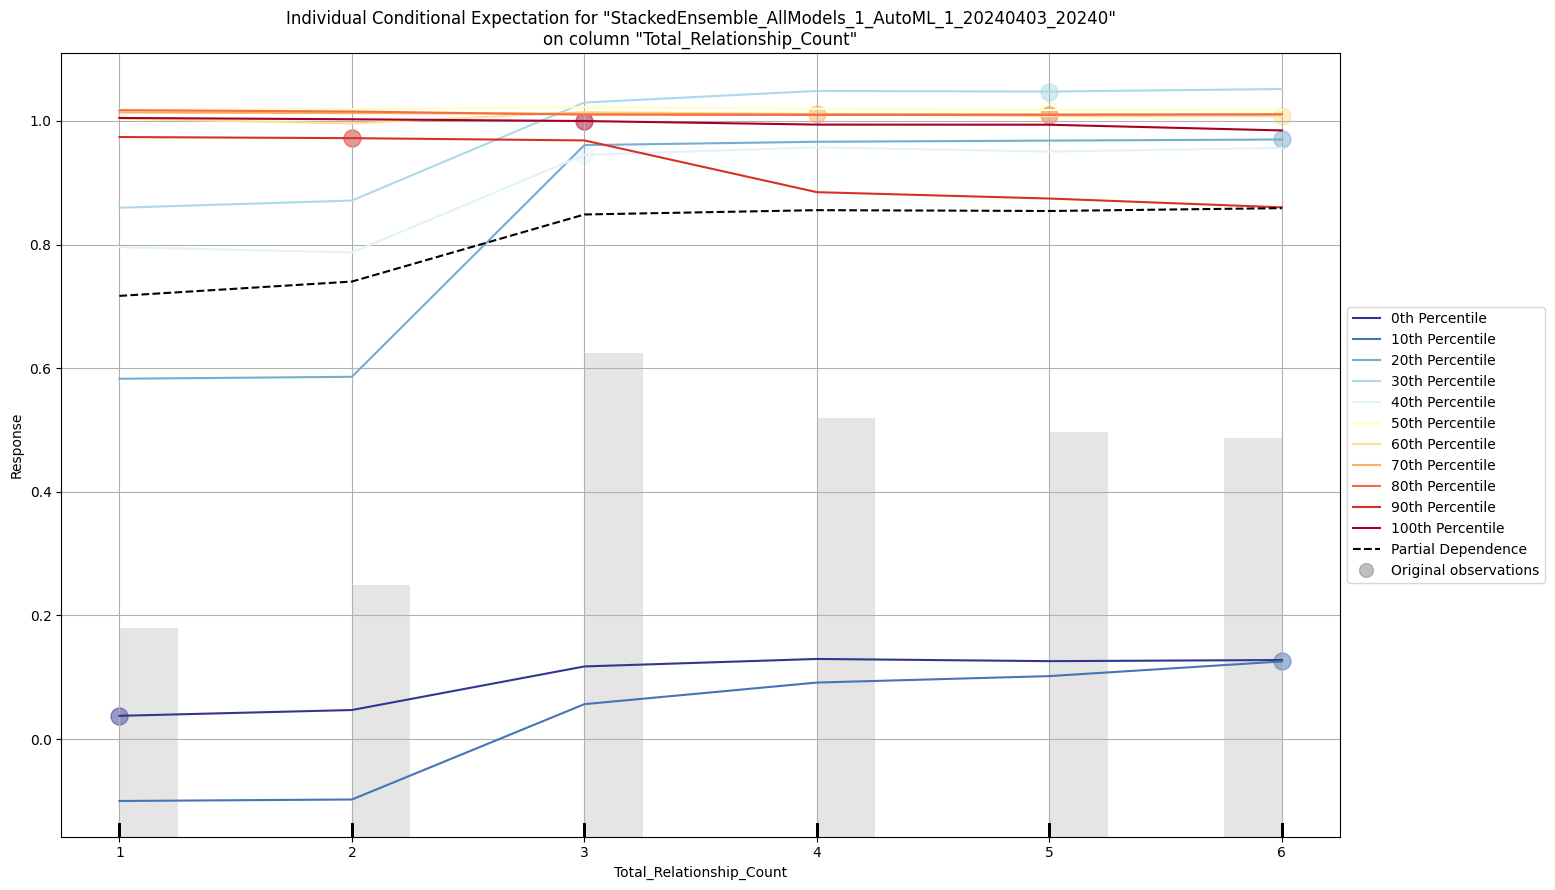

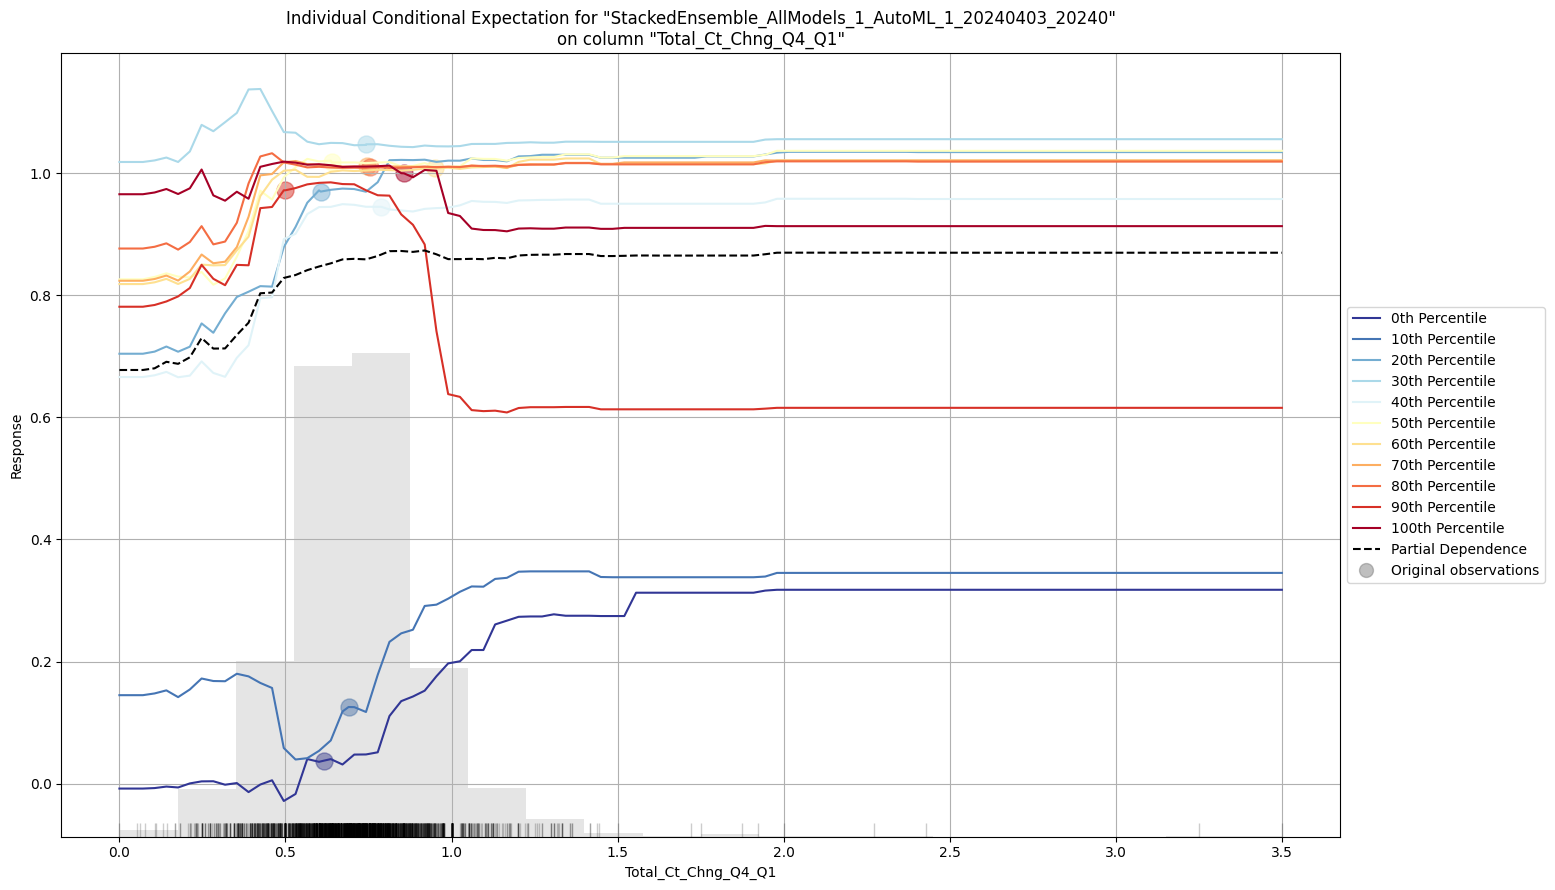

In [197]:
explain_model = aml.explain(frame = hf_test)

## Conclusion -
- The XGBoost model shows "Total_Trans_Ct" as the most impactful feature, with a mix of positive and negative SHAP values, indicating varied effects on the model output across different data points.

- The Linear Regression model seems to attribute significant importance to "Total_Trans_Ct" and "Credit_Limit", with the former having a range of both positive and negative effects, while "Credit_Limit" mostly contributes positively.

- The AutoML model also ranks "Total_Trans_Ct" as highly important but shows "Total_Trans_Amt" and "Total_Revolving_Bal" with larger spreads in SHAP values, indicating a wider variety of effects these features have on the predictions.

In all three models, "Total_Trans_Ct" is consistently a key feature, although the way it impacts the prediction varies. "Total_Trans_Amt" and "Total_Revolving_Bal" are also important across models but with different levels of impact and distribution of effects.

##**1. What is the question?**
The main problem is to determine the standized price of the target variable with respect to other features. Clean and select features using this dataset of world stock prices effectively for machine learning purposes. This includes preprocessing the data, handling missing values, encoding categorical variables, standardizing features, and selecting significant features for modeling.

##**2. What did you do?**
In this assignment, we perform initial exploratory data analysis to understand the structure and context of the data on which we are going to work and gain meaningful insights that could help to predict the outcome. Further, standardizing ensures features have a mean of 0 and a standard deviation of 1, bringing them onto a common scale. This helps in the effective comparison of features and prevents dominance by those with larger scales, enhancing machine learning algorithm performance. After analyzing the dataset, we identified relevant features and interpreted their impact by training multiple models (Logistic Regression, XGBoost and Auto ML) and using interpretability methods like regression coefficients, SHAP values, and partial dependency plots. Additionally, we assessed variable importance for each method.


##**3. How well did it work?**
For the model to perform better, I fitted 3 models which are Logistic Regression giving accuracy 90.268%, XGBoost Model giving accuracy 97%, and AutoML where GLM is the best model of all the other models in AutoML. Additionally, removing outliers from the dataset helped the model to perform better enhancing the accuracy by 1.067. Moreover, regularization was used to see whether it helps for overfitting, but it is concluded from the metrics of models that the model without regularization works better as compared to the models with regularization.

##**4. What did you learn?**
I learned how to -
- Prepare and preprocess data: This involved loading the Customer Churn Prediction dataset, handling missing values, label encoding categorical features, and conducting exploratory data analysis (EDA) to gain insights into the data.

- Select relevant features: I used techniques such as Ordinary Least Squares (OLS) regression and Random Forest Classification for feature selection to identify important predictors for stroke prediction.

- Apply various machine learning models: Specifically, I fitted logistic regression (a linear model), XGBoost (a tree-based model), and utilized AutoML, including generalized linear model (GLM), to predict stroke outcomes.

- Evaluate model performance: I assessed model performance using metrics such as accuracy and employed interpretability techniques like SHAP analysis to compare and understand model predictions.

- Performance improvement techniques: I experimented with outlier removal and regularization to enhance model accuracy. Outlier removal positively impacted accuracy, while regularization did not significantly affect model performance.

## REFERENCES -
* H2O Documentation: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html?_ga=2.129161676.1179250264.1708398551-1770022984.1708209167
* Scikit-Learn Documentation: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
* Seaborn Documentation: https://seaborn.pydata.org/tutorial/introduction.html
* Analytics Vidhya - https://www.analyticsvidhya.com/blog/2023/01/the-future-of-machine-learning-automl/
* StatsModel - https://www.statsmodels.org/stable/index.html
* AutoML Documents - https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e
- Shap Documentation - https://shap.readthedocs.io/en/latest/

## LICENSE-
MIT License

Copyright (c) 2024 ckulkarni13

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.